# Supporting files
Methods for setting axes, saving, exporting to files

In [1]:
import matplotlib.pyplot as plt
from utils import plotter
import logging
import numpy as np

from quantum_builder import QuantumBuilder

plt.style.use("support-files/qubit-01.mplstyle")

In [4]:
MY_COLOURS = {
    "DarkBlue": "#104e8b",     # dark blue (DodgerBlue4)
    "DarkRed": "#ed2200",     # dark red (red2)
    "Green": "#9acd32",     
    "Orange": "#ffc125",      # orange,
    "LightBlue": "#68838b",  # light steel blue,
    "Purple": "#6959cd",  # dark purple
    "Pink": "#ffa07a"  # pink salmon
}

# Aux plots

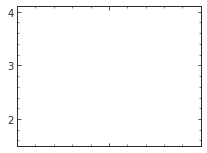

In [32]:
fig, ax = plt.subplots(1,1, figsize=(3, 2.5))

ax.set_xticks([0, 0.5, 1]);
ax.set_xticklabels([]);
ax.set_yticks([2,3,4]);

ax.set_ylim([1.5, 4.1])
ax.set_xlim([-0, 1])


plt.savefig("./output/clear-small-axes.svg", transparent=True)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4, 3))
ax.set_xlim([-0.5, 1.5])
ax.set_xticks([-0.5, 0, 0.5, 1, 1.5]);
ax.set_xticklabels([-0.5, 0, 0.5, 1, 1.5]);
ax.set_ylim([0, 3])


plt.savefig("./output/clear-4-3-axes.svg", transparent=True)

In [185]:
fig_ass = plt.figure(figsize=(4, 6))
ax_ass = fig_ass.subplots(nrows=2, ncols=1, sharex=True)

ax_ass[0].tick_params(labelsize=18)
ax_ass[1].tick_params(labelsize=18)


ax_ass[0].set_ylabel("$\omega/2\pi$ (GHz)", fontsize=14)
ax_ass[0].set_ylim([5, 18])

plt.savefig("./output/clear-4-6-axes.svg", transparent=True)

<IPython.core.display.Javascript object>

# Curvature at the flat regions
> `curvature.py`

Generates parameters for the curvature in different papers

In [ ]:
import curvature

In [2]:
zhu2010 = curvature.extract_curve_from_image(
        "data/zhu2010.png", [20, 100], [20, 100], [100, 250], [-0.01, 0.01], [2, 8]
    )

In [3]:
stern2014 = curvature.extract_curve_from_image(
        "data/stern2014.png", [230, 260], [0, 2], [0, 30], [-0.003, 0.003], [8.4, 9]
    )

In [4]:
gustavsson2012 = curvature.extract_curve_from_image(
        "data/gustavsson2012.png",
        [60, 140],
        [60, 120],
        [160, 180],
        [-0.005, 0.005],
        [2, 4],
    )

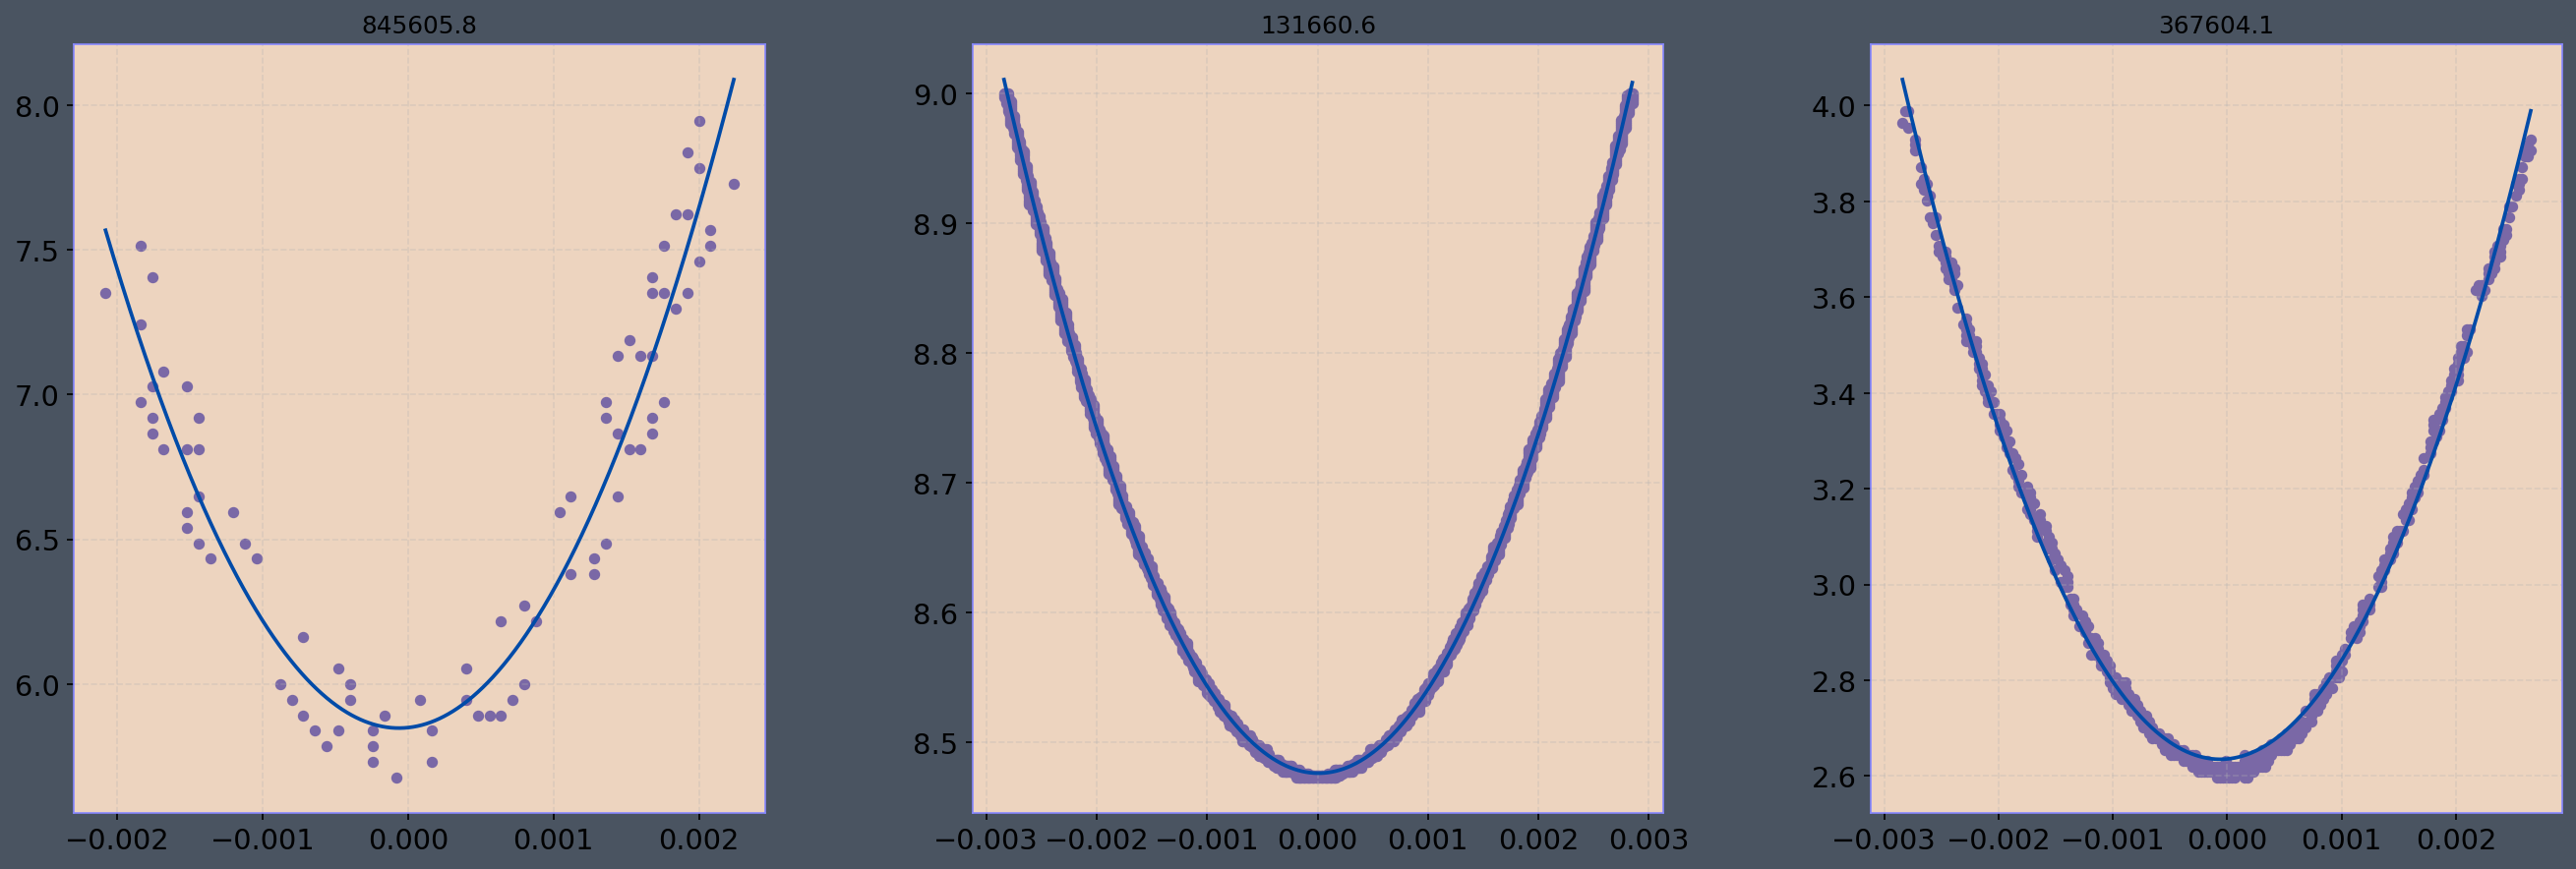

In [7]:
fig = plt.figure(figsize=(20, 7))
ax = fig.subplots(nrows=1, ncols=3)
curvature.fit_and_plot_parabolla(zhu2010, ax[0])
curvature.fit_and_plot_parabolla(stern2014, ax[1])
curvature.fit_and_plot_parabolla(gustavsson2012, ax[2])

# Rabi and Transmission plots
> `graph_analysis.py`

**Generates**
- `fig2_spectrum_dip.svg`: fit to the transmission dip
- `fig5_rabi.svg` oscillations

Gamma1   2.52596682673479
Gamma2:  4.983956296090957e-07
Omega:   6.2148193139220025
Offset:  10.045562154677716


<IPython.core.display.Javascript object>


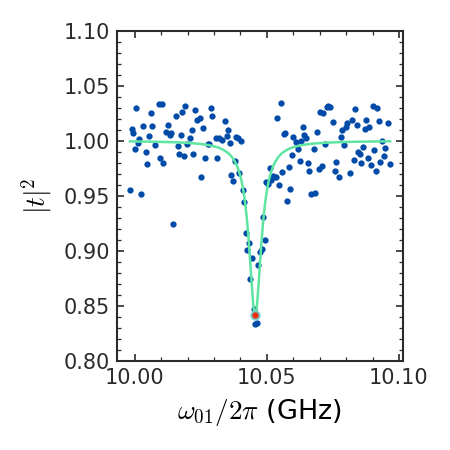

In [276]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("support-files/qubit-01.mplstyle")

from experimental_analysis.transmission_fitter import TransmissionFitter
from utils import plotter

transmission_fitter = TransmissionFitter()

# 1 - load data and filter outliers
transmission_fitter.load_data("data/2018_dipole/extinction_smith27.txt", 0, 1, convert_to_ghz=True)
transmission_fitter.filter(0.8, 10 ** 12, 0, 1.035)

# 2 - perform fitting
(gamma1, gamma2, omega, offset) = transmission_fitter.fit()

# 3 - visualise the fit
x_array_to_plot = np.linspace(min(transmission_fitter.transmission_x),
                      max(transmission_fitter.transmission_x), 500)
y_array_to_plot = transmission_fitter.fit_function(x_array_to_plot,
                                                gamma1, gamma2, omega, offset)
dip_index = np.argmin(y_array_to_plot)
x_dip = x_array_to_plot[dip_index]
y_dip = y_array_to_plot[dip_index]

# 3 - plot
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.scatter(transmission_fitter.transmission_x, transmission_fitter.transmission_y, marker="o", color="C0")
ax.plot(x_array_to_plot, y_array_to_plot, color="C9")
ax.plot(x_dip, y_dip,
               marker="o", 
#         color="#004BA8", 
        color="C1",
        markeredgecolor="C4",
               markersize=4, alpha=0.95,linestyle="")
ax.set_xlabel("$\omega_{01}/ 2 \pi$ (GHz)")
ax.set_ylabel("$|t|^2$")
ax.set_ylim([0.8, 1.1])
ax.tick_params(axis='both', which='major')
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/twin/fitting_spectrum_dip", "svg")

# Fitting the spectrum
Generates:
- `fitting_spectrum.svg`
- `fitting_spectrum_zoomed.svg`

In [2]:
%matplotlib notebook
import logging
import numpy as np
from quantum_builder import QuantumBuilder

QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 7,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(-3, 3, 100)
EC = 13.5
EJ = 92

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARN
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)
twin_qubit.run_simulation(evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:01


> Plot along with experimental results

<IPython.core.display.Javascript object>


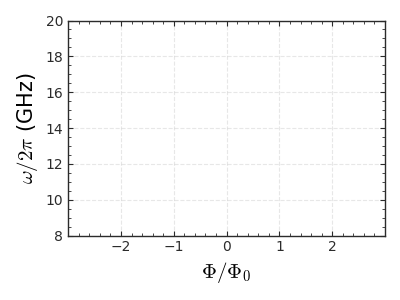

In [27]:
%matplotlib notebook
# import numpy as np
# import matplotlib.pyplot as plt
# plt.style.use("support-files/qubit.mplstyle")

from experimental_analysis.two_tone_data import TwoToneData
from utils import plotter

two_tone_data = TwoToneData()
# 1 - load the experminetal data
two_tone_data.load_data(base_file_name="data/2018_dipole/Qubit15_5JJ_Q2", 
                       offset=0.125,
                       period=0.7)

# 2 - plot simulation and spectrum
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
# ax.plot(two_tone_data["flux_12"], two_tone_data["spectrum_12"],
#         marker="o", 
# #         color=MY_COLOURS["DarkBlue"],
#         color="C0",
#         markeredgecolor="C2", 
#         markeredgewidth="0.4", markersize=4, alpha=0.95, 
#         linestyle="")
# ax.plot(two_tone_data["flux_23"], two_tone_data["spectrum_23"],
#         marker="o", 
# #         color=MY_COLOURS["DarkRed"],
#         color="C1",
#         markeredgecolor="#fb2c07", 
#         markeredgewidth="0.4", 
#         markersize=5, 
#         alpha=0.95,
#         linestyle="")

# ax.plot(FLUX_NUMBER, twin_qubit.simulations["1-2"], color="C0", linewidth=0.9)
# ax.plot(FLUX_NUMBER, twin_qubit.simulations["2-3"], color="C4", linewidth=0.9)
ax.set_xlim([-3, 3])
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_ylim([8, 20])
ax.set_xlabel("$\Phi/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)    
plt.grid()
plt.tight_layout()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum-grid", "svg")

> Zoomed in

<IPython.core.display.Javascript object>


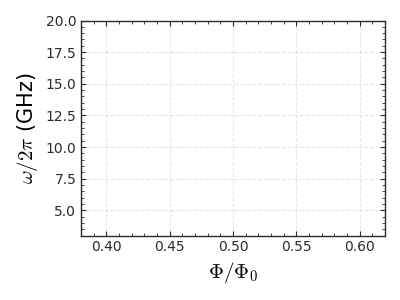

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
# ax.plot(two_tone_data["flux_12"], two_tone_data["spectrum_12"],
#         marker="o", color=MY_COLOURS["DarkBlue"], markeredgecolor="C2", markeredgewidth="0.8", markersize=5, alpha=0.95, 
#         linestyle="")
# ax.plot(two_tone_data["flux_23"], two_tone_data["spectrum_23"],
#         marker="o", color=MY_COLOURS["DarkRed"], markeredgecolor="#fb2c07", markeredgewidth="0.8", markersize=5, alpha=0.95,
#         linestyle="")

# ax.plot(twin_qubit, twin_qubit.simulations["1-2"], color="C0", linewidth=0.9)
# ax.plot(twin_qubit.flux_list, twin_qubit.simulations["2-3"], color="C4", linewidth=0.9)
ax.set_xlim([0.38, 1 - 0.38])
ax.set_ylim([3, 20])
ax.set_xlabel("$\Phi/\Phi_0$", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)
plt.tight_layout()
plt.grid()

plotter.save_onto_white_background(ax, "./output/fitting_spectrum_zoomed-grid", "svg")

# Simulating design parameters

In [186]:
fF = 10 ** (-15)
c = 10**(-10) #F/m Capacitance on interface
h = 6.64 * 10**(-34)
e = 1.6 * 10**(-19)
um = 10**(-6)
GHz = 10**(9)
kOhm = 10**3
Rq = 6.484*kOhm
Delta = 3.1*10**(-23) # Superconducting delta
Phi0 = h/(2 * e)
Gauss = 10**(-4) # Gauss to Wb/m²


R_square_room_temperature = {'Dynamic-20sccm': 6700.0, 'Static-0.4mBar': 17000, 'Static-0.25mBar': 12170.0, 
                                'Static-0.1mBar': 10_200, 
#                              'Static-0.1mBar': 9500, 
#                              'Static-0.1mBar': 5670.0, 
#                              'Static-0.1mBar': 6650.0,  # from latest july 2021 photon source run
                             'Static-0.13mBar': 8000}
R_cold_scaling = 1.1
JJ_x_scaling = 1.04
JJ_y_scaling = 1.05

def eval_expected_ej0(resistance_rt):
    EJ0 = Rq / (resistance_rt * RESISTANCE_COLD_SCALING) * Delta / 2
    return EJ0/h/GHz

def eval_resitance_from_ej0(x_side: float, y_side: float, EJ0: float):
    N_squares= x_side/100 * y_side/100
    EJ0 = EJ0 * h * GHz
    return Rq * N_squares * Delta / 2 / EJ0 / kOhm

def c_interdigitated(W: float, L: float, N: int):
    return c * N * (W + L)

def ec_interdigitated(W: float, L: float, N: int):
    Ec = e**2 / (2 * c_interdigitated(W, L, N)) / h / GHz
    return Ec

def c_xmon(L: float, S: float):
    return c * 4 * (L - 2 * S)

def ec_xmon(S, L):
    S = S*um
    L = L*um
    Ec = e**2 / (2 * c_xmon(L, S))
    return Ec / h / GHz

def evaluating_n_squares(EJ0: float, oxidation: str):
    EJ0 = EJ0 * GHz * h
    N_squares = EJ0 * R_square_room_temperature[oxidation] * R_cold_scaling / Rq * 2 / Delta
    return N_squares

"""
Evaluates exepcted Ej0 from the design parameters and known scalings
jj_side:              The side off the designed JJ in nm
"""
def eval_expected_ej0(jj_side, oxidation):
    x_side = jj_side; y_side = jj_side;
    x = jj_side * JJ_x_scaling
    y = jj_side * JJ_y_scaling

    # Number of 100x100nm² squares
    N_squares = x/100 * y/100
    EJ0 = Rq / (R_square_room_temperature[oxidation] * R_cold_scaling / N_squares) * Delta / 2
    return EJ0/h/GHz

## Loop area assesment

In [103]:
G = 10**(-5)
mA = 10**(-3)

In [113]:
L = 15.6 * G/mA

A1 = 3*6*um*um
A2 = 5.6*6*um*um

Iperiodic1 = (1/L * Phi0 / A1) / mA
Iperiodic2 = (1/L * Phi0 / A2) / mA

Iperiodic1, Iperiodic2

(0.7389601139601139, 0.3958714896214897)

In [115]:
A1 / um / um

18.0

In [116]:
A2 / um / um

33.599999999999994

## $E_J$ and $E_C$ assessment 

In [41]:
X = 800
Y = 200
N_squares = X/Y
EJ0 = Rq / (R_square_room_temperature["Dynamic-20sccm"] * R_cold_scaling / N_squares) * Delta / 2
EJ0 / h / GHz

82.14840365532687

In [46]:
e0 = 8.85*10**(-12)
eal = 10
area = 200*nm*800*nm
d = 2*nm

C = e0 * eal * area / d
print(C)

4*e*e/(2*C) / h / GHz

7.08e-15


10.891021713974546

In [189]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("support-files/qubit-01.mplstyle")

from quantum_builder import QuantumBuilder

alpha_spectra = []
alpha_list = [1, 1.15, 1.3]

for alpha in alpha_list:
    QUBIT_PARAMETERS = {
        "alpha": alpha,
#         "alpha": 1.023,
        "assymetry": 1,
        "jj_squares": 7,
        "states_per_island": 9,
    }
    FLUX_NUMBER = np.linspace(0, 1, 401)
    EC = 15
    EJ = 90
    twin_qubit = QuantumBuilder.build_twin_qubit(
        QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARN, other_parameters = "test"
    )
    twin_qubit.override_parameters(EC=EC, EJ=EJ)
    symmetric = twin_qubit.twin_qubit_simulator.simulate(
        number_of_levels_to_simulate=3,
        evaluate_dipole_element=False)
    alpha_spectra.append(symmetric)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:10
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:10
0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:11


In [217]:
plt.style.use("support-files/qubit-01.mplstyle")
fig = plt.figure(figsize=(4.7, 3))
ax = fig.subplots(nrows=1, ncols=1, sharex=True)
ax.axhspan(1.5, 20, color="red", alpha=0.05)

alpha = [0.1, 0.5, 1]
ls = ["-", "--", "dotted"]
lw = [1, 2, 3]
# cl = ["#ff3e96", "#6495ed", "#2f4f4f"]
cl = ["black", "C6", "C9"]
# ax[0].plot(|?
#     phi_r / (2 * pi), 
#                simulation_dictionary_for_transition_matrix["eigvals"][phiminus_index_at_zero, :,idx],
#                color=COLOUR_SCHEME[idx]
# )
for i, ass in enumerate(alpha_spectra):
    ax.plot(FLUX_NUMBER, ass["1-2"], color=cl[i], linestyle="-", label=alpha_list[i])
    ax.plot(FLUX_NUMBER, ass["2-3"], color=cl[i], linestyle="dotted")
ax.set_ylabel(r"$\omega_{01}/2\pi$ (GHz)")
ax.set_xlabel(r"Flux Number $\Phi/\Phi_0$")
ax.legend(title="α",bbox_to_anchor=(1, 0.7), loc="upper left")
# ax.set_ylim([3, 18])
# ax[0].set_yticks([3, 5, 10, 15, 18])


plt.tight_layout()
plt.show()
plt.savefig("./output/twin/win-qubit-design-simulation.pdf")

<IPython.core.display.Javascript object>

0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
0% [█] 100% | ETA: 00:00:00
Tot

<IPython.core.display.Javascript object>


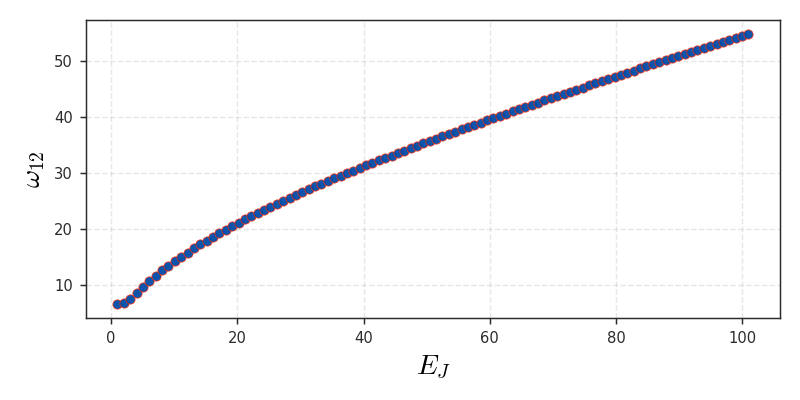

In [5]:
QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 7,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(0, 0, 1)
EC = 19
EJ_list = np.linspace(1, 101, 100)
twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.ERROR
)

transition_energy_list = []

for EJ in EJ_list:
    twin_qubit.override_parameters(EC=EC, EJ=EJ)
    twin_qubit.run_simulation(evaluate_dipole_element=True)
    transition_energy_list.append(twin_qubit.simulations["1-2"][0])
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
data_graph, = ax.plot(EJ_list, transition_energy_list,
        marker="o",
        markeredgecolor="#fb2c07",
        markeredgewidth="0.4",
        markersize=5,
        alpha=0.95,
        linestyle="")

ax.set_xlabel("$E_J$", size=15)
ax.set_ylabel("$\omega_{12}$", size=15)
plt.tight_layout()

# Plot of analytical spectrum and matrix elements

In [155]:
import matplotlib.pyplot as plt
import logging
import numpy as np
from quantum_builder import QuantumBuilder

plt.style.use("support-files/qubit-01.mplstyle")

QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 9,
}
FLUX_NUMBER = np.linspace(0.35, 0.65, 500)
EC = 13.5
EJ = 91

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARN, other_parameters = "test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)
symmetric = twin_qubit.twin_qubit_simulator.simulate(
    number_of_levels_to_simulate=5,
    evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:22


## Plot the sparse matrix to make sure we build correctly

charge
phi01
phi02
phi03
-i(phi02-phi01-phi_l)
+i(phi02-phi01-phi_l)
+i(phi02-phi03+phi_r)
-i(phi02-phi03+phi_r)


/Users/CCCP/.config/python_vi/qutip/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  """
/Users/CCCP/.config/python_vi/qutip/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  


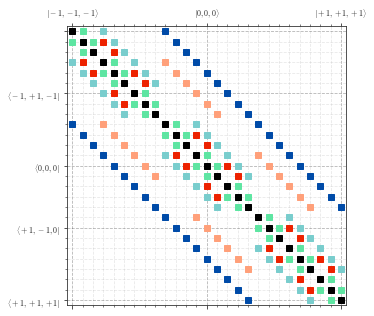

In [5]:
if QUBIT_PARAMETERS["states_per_island"] < 7:
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot()
    twin_qubit.plot_sparse_matrix(ax)
    ax.grid(b=True, which='major', color="black")
    ax.grid(b=True, which='minor')
    ax.set_xlim([-0.5, 27 - 0.5])
    ax.set_ylim([27 - 0.5, -0.5])

    # # 5 - add the ticks
    ax.set_xticks(np.linspace(
        0, 26, 27), minor=True)
    ax.set_yticks(np.linspace(
        0, 26, 27), minor=True)

    ax.set_xticks([0, 13, 26])
    xticklabels = [""] * 3
    xticklabels[0] = r"$\left|-1, -1, -1 \right\rangle$"
    xticklabels[1] = r"$\left|0, 0, 0 \right\rangle$"
    xticklabels[2] = r"$\left|+1, +1, +1 \right\rangle$"

    ax.set_yticks([0, 6, 13, 19, 26])
    yticklabels = [""] * 5
    yticklabels[1] = r"$\left\langle -1, +1, -1 \right|$"
    yticklabels[2] = r"$\left\langle 0, 0, 0 \right|$"
    yticklabels[3] = r"$\left\langle +1, -1, 0 \right|$"
    yticklabels[4] = r"$\left\langle +1, +1, +1 \right|$"

    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    plt.savefig(f"./output/matrix_visualisation.svg", transparent=True)
else:
    logging.info("Skipping plotting matrix as it is very large")

## Plot of the analytical spectrum
> Old notation used here

In [173]:
fig = plt.figure(figsize=(5, 5))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
ax[0].plot(
    np.linspace(0.35, 0.65, 401),
#     FLUX_NUMBER,
#     simulation_dictionary_for_transition_matrix[
#             idx
#         ]
#     simulation_dictionary_for_transition_matrix["eigvals"][0, :,:],
    simulation_dictionary_for_transition_matrix["eigvals"][:, 0, 1] - 
    simulation_dictionary_for_transition_matrix["eigvals"][:, 0, 0]
)
ax[0].plot(
    np.linspace(0.35, 0.65, 401),
    simulation_dictionary_for_transition_matrix["eigvals"][:, 0, 2] - 
    simulation_dictionary_for_transition_matrix["eigvals"][:, 0, 1]
)
# ax[0].plot(
#          simulation_dictionary_for_transition_matrix["eigvals"][:, 0, 3] - 
#         simulation_dictionary_for_transition_matrix["eigvals"][:, 0, 2],
# )
ax[0].set_ylabel(r"$\omega/2\pi$(GHz)", fontsize=12)
ax[0].set_ylim([3, 18])
# ax[0].set_yticks([3, 5, 10, 15, 18])

ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d32"]) * 10**6, color=MY_COLOURS["DarkBlue"])
ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d21"]) * 10**6, color=MY_COLOURS["DarkRed"])
ax[1].plot(twin_qubit.flux_list, np.array(twin_qubit.simulations["d13"]) * 10**6, color=MY_COLOURS["Green"])
ax[1].set_xlabel("Normalised Magnetic Flux ($\Phi/\Phi_0$)", fontsize=14)
ax[1].set_ylabel(r"Matrix elements ($\mu$V)", fontsize=14)
ax[1].set_xlim([0.365, 0.635])

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

AttributeError: 'TwinQubit' object has no attribute 'flux_list'

## Add the assymetric results

In [174]:
QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1.011,
    "jj_squares": 2,
    "states_per_island": 9,
}
twin_qubit_ass = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARNING
)
twin_qubit_ass.override_parameters(EC=EC, EJ=EJ)
antisymmetric = twin_qubit_ass.twin_qubit_simulator.simulate(
    number_of_levels_to_simulate=5,
    evaluate_dipole_element=True)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:20


<IPython.core.display.Javascript object>


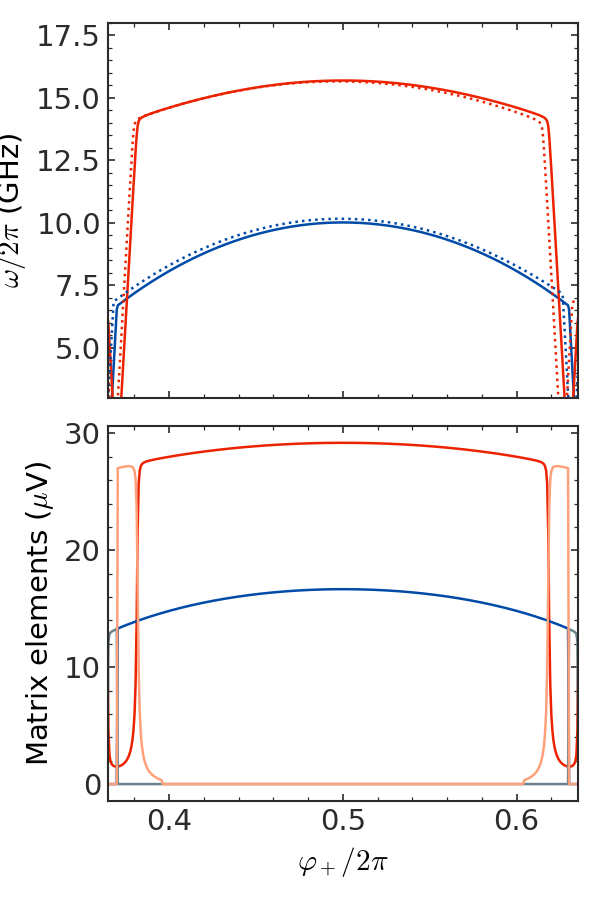

In [183]:
fig_ass = plt.figure(figsize=(4, 6))
ax_ass = fig_ass.subplots(nrows=2, ncols=1, sharex=True)

ax_ass[0].tick_params(labelsize=18)
ax_ass[1].tick_params(labelsize=18)


ax_ass[0].plot(FLUX_NUMBER, symmetric["1-2"])
ax_ass[0].plot(FLUX_NUMBER, symmetric["2-3"])
ax_ass[0].set_ylabel("$\omega/2\pi$ (GHz)", fontsize=14)
ax_ass[0].set_ylim([3, 18])

ax_ass[1].plot(FLUX_NUMBER, 10**6 * np.array(symmetric["d1-2"]), color="C1")
ax_ass[1].plot(FLUX_NUMBER, 10**6 * np.array(symmetric["d0-1"]), color="C0")
ax_ass[1].plot(FLUX_NUMBER, 10**6 * np.array(symmetric["d0-2"]), color="C7")
ax_ass[1].plot(FLUX_NUMBER, 10**6 * np.array(symmetric["d1-3"]), color="C6")

ax_ass[1].set_xlabel(r"$\varphi_+/2\pi$", fontsize=14)
ax_ass[1].set_ylabel(r"Matrix elements ($\mu$V)", fontsize=14)
ax_ass[1].set_xlim([0.365, 0.635])

ax_ass[0].plot(FLUX_NUMBER, antisymmetric["1-2"], color="C0", linestyle=":")
ax_ass[0].plot(FLUX_NUMBER, antisymmetric["2-3"], color="C1", linestyle=":")
# ax_ass[1].plot(FLUX_NUMBER, 10**6 * np.array(antisymmetric["d1-2"]), color=MY_COLOURS["DarkRed"], linestyle=":")
# ax_ass[1].plot(FLUX_NUMBER, 10**6 * np.array(antisymmetric["d0-1"]), color=MY_COLOURS["DarkBlue"], linestyle=":")
# ax_ass[1].plot(FLUX_NUMBER, 10**6 * np.array(antisymmetric["d0-2"]), color=MY_COLOURS["LightBlue"], linestyle=":")
# ax_ass[1].plot(FLUX_NUMBER, 10**6 * np.array(antisymmetric["d1-3"]), color=MY_COLOURS["Pink"], linestyle=":")

ax_ass[1].xaxis.set_tick_params(labelsize=14)
ax_ass[1].yaxis.set_tick_params(labelsize=14)
ax_ass[0].xaxis.set_tick_params(labelsize=14)
ax_ass[0].yaxis.set_tick_params(labelsize=14)

plt.tight_layout()
plt.show()

In [184]:
plt.savefig(f"./output/twin/theoretical_transition_dipole_simulations.svg", transparent=True)

# Investigating discerpancy with MatLab
- Remember that Matlab has strange indexing, and make sure to write matlab correctly

In [15]:
def load_matlab_27_row_col(file: str, second_col_type=int):
    "row, col, bloat"
    row_col_set = []
    with open(file, "r") as fin:
        for idx, line in enumerate(fin.readlines()):
            split_line = line.replace("\n","").replace("i", "j").split(",")
            row_col_set.append((int(split_line[0]), second_col_type(split_line[1])))
    return set(row_col_set)

def load_matlab_27_complex(file: str):
    "row, col, complex-value"
    matlab_array = np.zeros((27), dtype=np.complex)
    with open(file, "r") as fin:
        for line in fin.readlines():
            split_line = line.replace("\n","").replace("i", "j").split(",")
            x = int(split_line[0])
            z = np.complex(split_line[1])
            matlab_array[x] = z
    return matlab_array

def load_matlab_27_by_27_complex(file: str):
    "row, col, complex-value"
    matlab_array = np.zeros((27, 27), dtype=np.complex)
    with open(file, "r") as fin:
        for line in fin.readlines():
            split_line = line.replace("\n","").replace("i", "j").split(",")
            x = int(split_line[0])
            y = int(split_line[1])
            z = np.complex(split_line[2])
            matlab_array[x][y] = z
    return matlab_array

def print_differences_2d_array(array_a, array_b, abs_tolerance = 0.01):
    print("🐳 Printing differences in 2d arrays")
    x_diff_idx, y_diff_idx = np.nonzero(
        array_a - array_b
    )
    counter = 0
    for (x, y) in zip(x_diff_idx, y_diff_idx):
        if (
            np.abs(
                np.abs(np.real(array_a[x][y])) - 
                np.abs(np.real(array_b[x][y]))
            ) > abs_tolerance
            or 
            np.abs(
                np.abs(np.imag(array_a[x][y])) - 
                np.abs(np.imag(array_b[x][y]))
            ) > abs_tolerance
           ):
            print(f"{x:5} - {y:<5}Left: {array_a[x][y]:<30}Right:{array_b[x][y]}")
            counter += 1
    print(f"Total differences: {counter}")
        
def print_differences_1d_array(array_a, array_b, abs_tolerance = 0.01):
    print("🐳 Printing differences in 1d arrays")
    for (idx, (x, y)) in enumerate(zip(array_a, array_b)):
        if np.abs(x - y) > abs_tolerance and np.abs(x + y) > abs_tolerance:
            print(f"{idx:<5}Left: {array_a[idx]:<30}Right:{array_b[idx]}")

In [16]:
%matplotlib notebook
from typing import List, Tuple, Dict
import logging

import matplotlib.pyplot as plt
plt.style.use("support-files/qubit.mplstyle")
from matplotlib import cm
import matplotlib as mpl
import scipy

import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos

from quantum_builder import QuantumBuilder

In [17]:
phi_l = 0.4 * 2 * pi
phi_r = 0.4 * 2 * pi

EC = 13.5
EJ = 91
ALPHA = 1.023
QUBIT_PARAMETERS = {
    "alpha": ALPHA,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 3,
}
# Build Hamiltonian
twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, [], logging_level=logging.WARNING, other_parameters=""
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)

# Dirty sub
self = twin_qubit
self.twin_qubit_hamiltonian_manager.stage2_prepare_constant_hamiltonian()
self.twin_qubit_hamiltonian_manager.stage3_build_hamiltonian_for_simulation(
    phi_l,  # in Matlab it is f
    phi_r #in matlab it is f1
)

## Check Hamiltonian by parts
> As changes were made to the indexing, some of the columns may be different now

In Matlab `f=`$\varphi_l$ and `f1=`$\varphi_r$
- [x] Diagonal charge is OK
- [x] $\varphi_{02}$ is OK
- [x] $\varphi_{01}$ and $\varphi_{03}$ where switched positions
- [x] $+i\left[\varphi_{02} - \varphi_{01} - \phi_l\right]$ is the P12
- [x] $-i\left[\varphi_{02} - \varphi_{01} - \phi_l\right]$ is the P21
- [x] $+i\left[\varphi_{02} - \varphi_{03} + \phi_r\right]$ is the P23
- [x] $-i\left[\varphi_{02} - \varphi_{03} + \phi_r\right]$ is the P32

### Check $\varphi_{01}$ indexes

In [4]:
phi01_set_matlab = load_matlab_27_row_col("matlab_dumps/phi01_rows_and_cols.txt")

phi01_set_python = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton["phi01"]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton["phi01"]["col"]):
    phi01_set_python.append((row, col))
phi01_set_python = set(phi01_set_python)  

len_matlab = len(phi01_set_matlab)
len_python = len(phi01_set_python)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = phi01_set_python.symmetric_difference(phi01_set_matlab)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {phi01_set_matlab.difference(phi01_set_python)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {phi01_set_python.difference(phi01_set_matlab)}")

### Check $\varphi_{03}$ indexes

In [5]:
phi03_set_matlab = load_matlab_27_row_col("matlab_dumps/phi03_rows_and_cols.txt")

phi03_set_python = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton["phi03"]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton["phi03"]["col"]):
    phi03_set_python.append((row, col))
phi03_set_python = set(phi03_set_python)  

len_matlab = len(phi03_set_matlab)
len_python = len(phi03_set_python)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = phi03_set_python.symmetric_difference(phi03_set_matlab)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {phi03_set_matlab.difference(phi03_set_python)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {phi03_set_python.difference(phi03_set_matlab)}")

### Check $\varphi_{02} - \varphi_{01} + \varphi_l$ indexes

In [13]:
matlab_file = "matlab_dumps/phi12_rows_and_cols.txt"
python_dict = "+i(phi02-phi01-phi_l)"

matlab_set = load_matlab_27_row_col(matlab_file)

python_set = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["col"]):
    python_set.append((row, col))
python_set = set(python_set)  

len_matlab = len(matlab_set)
len_python = len(python_set)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = matlab_set.symmetric_difference(python_set)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {matlab_set.difference(python_set)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {python_set.difference(matlab_set)}")

In [14]:
matlab_file = "matlab_dumps/phi21_rows_and_cols.txt"
python_dict = "-i(phi02-phi01-phi_l)"

matlab_set = load_matlab_27_row_col(matlab_file)

python_set = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["col"]):
    python_set.append((row, col))
python_set = set(python_set)  

len_matlab = len(matlab_set)
len_python = len(python_set)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = matlab_set.symmetric_difference(python_set)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {matlab_set.difference(python_set)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {python_set.difference(matlab_set)}")

### Check $\varphi_{02} - \varphi_{03} + \varphi_r$ indexes

In [9]:
matlab_file = "matlab_dumps/phi23_rows_and_cols.txt"
python_dict = "+i(phi02-phi03+phi_r)"

matlab_set = load_matlab_27_row_col(matlab_file)

python_set = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["col"]):
    python_set.append((row, col))
python_set = set(python_set)  

len_matlab = len(matlab_set)
len_python = len(python_set)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = matlab_set.symmetric_difference(python_set)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {matlab_set.difference(python_set)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {python_set.difference(matlab_set)}")

In [10]:
matlab_file = "matlab_dumps/phi32_rows_and_cols.txt"
python_dict = "-i(phi02-phi03+phi_r)"

matlab_set = load_matlab_27_row_col(matlab_file)

python_set = []
for (row, col) in zip(self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["row"],
                      self.twin_qubit_hamiltonian_manager.hamiltonian_skeleton[python_dict]["col"]):
    python_set.append((row, col))
python_set = set(python_set)  

len_matlab = len(matlab_set)
len_python = len(python_set)
assert len_matlab == len_python, f"""Lengths are different! len(matlab)={len_matlab}, len(python)={len_python}"""

difference = matlab_set.symmetric_difference(python_set)
len_difference = len(difference)
if len_difference > 0:
    print(f"Exists in matlab - does not exist in python: {matlab_set.difference(python_set)}")
    print("")
    print(f"Exists in python - does not exist in matlab: {python_set.difference(matlab_set)}")

## Check Hamiltonian Full

In [97]:
# Check Hamiltonian
print_differences_2d_array(
    load_matlab_27_by_27_complex("matlab_dumps/H_new.txt"),
    np.array(
       self.twin_qubit_hamiltonian_manager.hamiltonian_simulation.todense()
    ),
    abs_tolerance=0.01
)

🐳 Printing differences in 2d arrays
Total differences: 0


## Check voltage operator

In [98]:
# Check V02 - we need a prefix of x2
(voltage_matrix, _) = self.twin_qubit_operator_builder.build()
print_differences_2d_array(
    load_matlab_27_by_27_complex("matlab_dumps/voltage_matrix.txt"),
    np.array(
       voltage_matrix.todense()
    ) * 2
)

🐳 Printing differences in 2d arrays
Total differences: 0


## Check evaluation

In [19]:
# Evaluated with python
(eigvals_python, eigvecs_python) = scipy.linalg.eigh(
    self.twin_qubit_hamiltonian_manager.hamiltonian_simulation.todense()
)
eigvecs_python[0]

array([ 0.0278395 +0.j, -0.00903846-0.j, -0.10694635-0.j,  0.10649184+0.j,
       -0.00644703-0.j,  0.04983588+0.j, -0.30720622-0.j, -0.16077738-0.j,
       -0.05953668-0.j,  0.02473355+0.j, -0.15821282-0.j,  0.00890896+0.j,
        0.21409281+0.j,  0.45633226+0.j,  0.04272702+0.j,  0.11232514+0.j,
       -0.22372578-0.j,  0.49094659+0.j, -0.15649317-0.j,  0.02150692-0.j,
       -0.06609448-0.j, -0.12638369-0.j,  0.38449957-0.j, -0.11863537-0.j,
        0.06240457-0.j,  0.21664305-0.j, -0.08192704-0.j])

In [20]:
# Evalauted using matlab matrix
(eigvals_matlab, eigvecs_matlab) = scipy.linalg.eigh(
    load_matlab_27_by_27_complex("matlab_dumps/H_new.txt")
)
eigvecs_matlab[0]

array([ 0.02783905+0.j, -0.00903982-0.j, -0.10694739-0.j,  0.1064912 +0.j,
       -0.00644867-0.j, -0.04983737-0.j, -0.30720607-0.j, -0.16077412-0.j,
       -0.05954132-0.j,  0.02473088+0.j, -0.1582116 -0.j, -0.0089121 -0.j,
        0.21408987+0.j, -0.4563338 -0.j,  0.0427177 +0.j,  0.11232434+0.j,
       -0.2237263 -0.j,  0.49094779-0.j, -0.15648987-0.j,  0.02150188-0.j,
       -0.06609532-0.j, -0.12638529-0.j,  0.38450075-0.j, -0.1186338 -0.j,
        0.06240493-0.j,  0.21664379-0.j, -0.08192726-0.j])

In [21]:
# Evaluated with python using sparse
(eigvals_python_sp, eigvecs_python_sp) = scipy.sparse.linalg.eigsh(
    self.twin_qubit_hamiltonian_manager.hamiltonian_simulation,
    5,
    which="SR",
    tol=0,
)
eigvecs_python_sp = np.transpose(eigvecs_python_sp)
eigvecs_python_sp[0]

array([-0.02698686-0.0068372j , -0.02195957-0.00207204j,
        0.03123114+0.05302724j, -0.06978157-0.01767937j,
       -0.23216062-0.13259704j, -0.15601427-0.15842169j,
        0.22832619+0.05784713j,  0.18945349+0.12037269j,
        0.03123114+0.05302724j, -0.02029712-0.00863382j,
        0.10361415+0.02625096j,  0.18945349+0.12037269j,
       -0.26728974+0.00605979j, -0.48551524-0.12300675j,
       -0.23216062-0.13259704j,  0.22391394-0.0156448j ,
        0.10361415+0.02625096j, -0.02195957-0.00207204j,
        0.05271223-0.03175993j,  0.22391394-0.0156448j ,
        0.22832619+0.05784713j, -0.21262535+0.06502574j,
       -0.26728974+0.00605979j, -0.06978157-0.01767937j,
        0.05271223-0.03175993j, -0.02029712-0.00863382j,
       -0.02698686-0.0068372j ])

In [22]:
# Evaluated with python using matlab matrix using sparse
(eigvals_matlab_sp, eigvecs_matlab_sp) = scipy.sparse.linalg.eigsh(
    load_matlab_27_by_27_complex("matlab_dumps/H_new.txt"),
    5,
    which="SR",
    tol=0,
)
eigvecs_matlab_sp = np.transpose(eigvecs_matlab_sp)
eigvecs_matlab_sp[0]

array([ 0.02747874-0.00446448j,  0.020969  -0.00683649j,
       -0.04975186-0.03622365j,  0.0710571 -0.01154468j,
        0.26575102+0.02927954j,  0.20616519+0.08326798j,
       -0.2324906 +0.03777286j, -0.22170501-0.03505633j,
       -0.04975186-0.03622365j,  0.02205477-0.00015361j,
       -0.10550668+0.01714172j, -0.22170501-0.03505633j,
        0.24281252-0.11190611j,  0.4943713 -0.08032075j,
        0.26575102+0.02927954j, -0.1992032 +0.1034415j ,
       -0.10550668+0.01714172j,  0.020969  -0.00683649j,
       -0.03572501+0.05011112j, -0.1992032 +0.1034415j ,
       -0.2324906 +0.03777286j,  0.16919963-0.14425369j,
        0.24281252-0.11190611j,  0.0710571 -0.01154468j,
       -0.03572501+0.05011112j,  0.02205477-0.00015361j,
        0.02747874-0.00446448j])

In [23]:
# Evaluated in matlab
eigvecs_matlab_loaded = []

for i in [0, 1, 2, 3, 4]:
    eigvecs_matlab_loaded.append(
        load_matlab_27_complex(f"matlab_dumps/eigenvec_new{i}.txt")
    )
    
with open("matlab_dumps/eigvals_new.txt", "r") as fin:
    eigvals_matlab_loaded = [x.split(",")[1].replace("\n", "") for x in fin.readlines()]
eigvecs_matlab_loaded[0]

array([ 0.025969-0.010032j ,  0.019112-0.011011j , -0.056148-0.025193j ,
        0.06715 -0.02594j  ,  0.26608 -0.026117j ,  0.2189  +0.038993j ,
       -0.21972 +0.084876j , -0.22417 +0.011387j , -0.056148-0.025193j ,
        0.021551-0.0046969j, -0.099707+0.038517j , -0.22417 +0.011387j ,
        0.21454 -0.15955j  ,  0.46721 -0.18048j  ,  0.26608 -0.026117j ,
       -0.17361 +0.14228j  , -0.099707+0.038517j ,  0.019112-0.011011j ,
       -0.02463 +0.056397j , -0.17361 +0.14228j  , -0.21972 +0.084876j ,
        0.13584 -0.17603j  ,  0.21454 -0.15955j  ,  0.06715 -0.02594j  ,
       -0.02463 +0.056397j ,  0.021551-0.0046969j,  0.025969-0.010032j ])

### Proof that eigenvalues are the same

In [24]:
print(f"{'Python:':<20}{eigvals_python[:5]}")
print(f"{'Python Sparse:':<20}{eigvals_python_sp}")
print(f"{'Matlab:':<20}{eigvals_matlab[:5]}")
print(f"{'Matlab Sparse:':<20}{eigvals_matlab_sp}")
print(f"{'Matlab Loaded:':<20}{eigvals_matlab_loaded}")

Python:             [-151.41014466 -141.42422832 -130.91533856 -100.84096761  -99.83212913]
Python Sparse:      [-151.41014466 -141.42422832 -130.91533856 -100.84096761  -99.83212913]
Matlab:             [-151.40985977 -141.42381771 -130.91468626 -100.84048954  -99.83124057]
Matlab Sparse:      [-151.40985977 -141.42381771 -130.91468626  -99.83124057 -100.84048954]
Matlab Loaded:      ['-151.41', '-141.42', '-130.92', '-100.84', '-99.832', '-95.046']


### Proof that we need use use sparse evaluation in order to be consistent with Matlab
> The difference is in a phase rotation applied to every element of the vector

> However, sparse and full evaluation give different results

In [25]:
for i in [1]:
    print("🦑 Python / Matlab 🦑")
    print(eigvecs_python[i] / eigvecs_matlab[i])
    
    print("Python / Python Sparse")
    print(eigvecs_python[i] / eigvecs_python_sp[i])
    
    print("Matlab / Matlab Sparse")
    print(eigvecs_matlab[i] / eigvecs_matlab_sp[i])
    
    print("Python Sparse / Matlab Sparse")
    print(eigvecs_python_sp[i] / eigvecs_matlab_sp[i])
        
    print("Python / Matlab Loaded")
    print(eigvecs_python[i] / eigvecs_matlab_loaded[i])
    
    print("Matlab / Matlab Loaded")
    print(eigvecs_matlab[i] / eigvecs_matlab_loaded[i])
    
    print("🦑 Matlab Sparse / Matlab Loaded 🦑")
    print(eigvecs_matlab_sp[i] / eigvecs_matlab_loaded[i])
    
    print("🦑 Python Sparse / Matlab Loaded 🦑")
    print(eigvecs_python_sp[i] / eigvecs_matlab_loaded[i])
    print("----")

🦑 Python / Matlab 🦑
[ 1.00008181+4.52371133e-05j  0.9999913 +4.37487124e-06j
  0.99999512-1.17776877e-05j  0.99999514-8.30734937e-06j
  1.00002453+1.71647741e-05j -1.00006655+2.33560936e-05j
  1.00000418+6.12259806e-06j  0.99995464-8.33280178e-06j
  0.99999528+1.39590756e-07j  1.00012377+1.04659839e-04j
  1.00000382+1.00721887e-05j -0.99998647+3.33777726e-06j
  1.00000335-5.52486599e-06j -1.0000083 +6.17479984e-06j
  0.99995612-7.74974320e-05j  0.99999749+1.32988467e-06j
  1.00000587-7.85877739e-06j  1.00000376+9.07098582e-06j
  1.00000816-5.40424794e-07j  1.00001402+6.86248718e-06j
  0.99998638-1.20857058e-06j  0.9999923 -4.09795896e-06j
  0.9999959 +3.51691211e-06j  1.00000735-7.57028676e-07j
  0.99999713+7.27545034e-07j  0.99999701+2.39209622e-06j
  0.99999842+1.63823234e-06j]
Python / Python Sparse
[ 1.36517241e+00+2.02278553e+00j -4.25600888e-01-9.04910982e-01j
 -1.06409347e+00-4.65684449e-02j -4.08212943e-02-1.28794789e+00j
 -1.43916815e-01+4.37850341e-01j -3.38037355e+13+2.50548

### Check matrix element

In [70]:
first_half = eigvecs_matlab_loaded[0]
for i in first_half:
    print(i)

(0.025969-0.010032j)
(0.019112-0.011011j)
(-0.056148-0.025193j)
(0.06715-0.02594j)
(0.26608-0.026117j)
(0.2189+0.038993j)
(-0.21972+0.084876j)
(-0.22417+0.011387j)
(-0.056148-0.025193j)
(0.021551-0.0046969j)
(-0.099707+0.038517j)
(-0.22417+0.011387j)
(0.21454-0.15955j)
(0.46721-0.18048j)
(0.26608-0.026117j)
(-0.17361+0.14228j)
(-0.099707+0.038517j)
(0.019112-0.011011j)
(-0.02463+0.056397j)
(-0.17361+0.14228j)
(-0.21972+0.084876j)
(0.13584-0.17603j)
(0.21454-0.15955j)
(0.06715-0.02594j)
(-0.02463+0.056397j)
(0.021551-0.0046969j)
(0.025969-0.010032j)


In [71]:
second_half = 2 * voltage_matrix.dot(np.transpose(eigvecs_matlab_loaded[1]))
for i in second_half:
    print(i)

(0.2221100346020762-0.09420771131982207j)
(2.8071725160652505-0.17840620365793378j)
(2.199372219476026-0.03131626297577855j)
(-2.751117152743451+1.1668991596638658j)
(-1.385768660405339+0.39753929807217014j)
0j
0j
(1.6151285219970344-0.4890696984676225j)
(2.199372219476026-0.03131626297577855j)
(2.0794537815126057-1.8942308452792884j)
(4.325338606030648-1.834611962432032j)
(1.6151285219970344-0.4890696984676225j)
(-1.2490336134453783+0.7199777558082058j)
0j
(-1.385768660405339+0.39753929807217014j)
(1.474189322787939-0.8212778052397431j)
(4.325338606030648-1.834611962432032j)
(2.8071725160652505-0.17840620365793378j)
(1.551265447355413-1.5594068215521506j)
(1.474189322787939-0.8212778052397431j)
0j
0j
(-1.2490336134453783+0.7199777558082058j)
(-2.751117152743451+1.1668991596638658j)
(1.551265447355413-1.5594068215521506j)
(2.0794537815126057-1.8942308452792884j)
(0.2221100346020762-0.09420771131982207j)


In [82]:
np.abs(
    np.dot(
    np.array([1+1j, 2+1j]),
    np.array([2+1j, 0]),
)
)

3.1622776601683795

In [75]:
first_half[:1]

array([0.025969-0.010032j])

In [76]:
second_half[:1]

array([0.22211003-0.09420771j])

In [78]:
0.025969 * 0.22211003 - 0.010032 * 0.09420771

0.00482288362235

In [73]:
np.dot(first_half[:1], second_half[:1])

(0.004822883728620862-0.004674687922392487j)

In [84]:
np.conjugate(first_half).dot(second_half)

(-4.704236788974248+0.1529524644797826j)

In [38]:
voltage_matrix.dot(eigvecs_matlab_loaded[1])

array([ 0.11105502-0.04710386j,  1.40358626-0.0892031j ,
        1.09968611-0.01565813j, -1.37555858+0.58344958j,
       -0.69288433+0.19876965j,  0.        +0.j        ,
        0.        +0.j        ,  0.80756426-0.24453485j,
        1.09968611-0.01565813j,  1.03972689-0.94711542j,
        2.1626693 -0.91730598j,  0.80756426-0.24453485j,
       -0.62451681+0.35998888j,  0.        +0.j        ,
       -0.69288433+0.19876965j,  0.73709466-0.4106389j ,
        2.1626693 -0.91730598j,  1.40358626-0.0892031j ,
        0.77563272-0.77970341j,  0.73709466-0.4106389j ,
        0.        +0.j        ,  0.        +0.j        ,
       -0.62451681+0.35998888j, -1.37555858+0.58344958j,
        0.77563272-0.77970341j,  1.03972689-0.94711542j,
        0.11105502-0.04710386j])

array([ 0.025969-0.010032j ,  0.019112-0.011011j , -0.056148-0.025193j ,
        0.06715 -0.02594j  ,  0.26608 -0.026117j ,  0.2189  +0.038993j ,
       -0.21972 +0.084876j , -0.22417 +0.011387j , -0.056148-0.025193j ,
        0.021551-0.0046969j, -0.099707+0.038517j , -0.22417 +0.011387j ,
        0.21454 -0.15955j  ,  0.46721 -0.18048j  ,  0.26608 -0.026117j ,
       -0.17361 +0.14228j  , -0.099707+0.038517j ,  0.019112-0.011011j ,
       -0.02463 +0.056397j , -0.17361 +0.14228j  , -0.21972 +0.084876j ,
        0.13584 -0.17603j  ,  0.21454 -0.15955j  ,  0.06715 -0.02594j  ,
       -0.02463 +0.056397j ,  0.021551-0.0046969j,  0.025969-0.010032j ])

In [31]:
(voltage_matrix, _) = self.twin_qubit_operator_builder.build()

for (i, j) in [(0 ,1)]:
    
    print(f"{'Python:':<20}{np.abs(eigvecs_python[0].dot(voltage_matrix.dot(eigvecs_python[1])))}")
    print(f"{'🦑Python Sparse:':<20}{np.abs(eigvecs_python_sp[0].dot(voltage_matrix.dot(eigvecs_python_sp[1])))}")
    print(f"{'Matlab:':<20}{np.abs(eigvecs_matlab[0].dot(voltage_matrix.dot(eigvecs_matlab[1])))}")
    print(f"{'🦑Matlab Sparse:':<20}{np.abs(eigvecs_matlab_sp[0].dot(voltage_matrix.dot(eigvecs_matlab_sp[1])))}")
    print(f"{'🦑Matlab Loaded:':<20}{np.abs(eigvecs_matlab_loaded[0].dot(voltage_matrix.dot(eigvecs_matlab_loaded[1])))}")    

    with open("matlab_dumps/transition01.txt") as fin:
        transition = fin.readline().split(",")
        absolute = transition[1]
    print(f"{'🦑Matlab Evaluated:':<20}{absolute}")

Python:             1.571599510374732
🦑Python Sparse:     2.0948138257812516
Matlab:             1.5716047383050922
🦑Matlab Sparse:     2.094842953159115
🦑Matlab Loaded:     2.094831090778908
🦑Matlab Evaluated:  4.7067



# Simulation in rotated coordinates
Save as the above block, except this time it is plotted in $\omega_{21}$ over $\varphi_r-\varphi_l$ coordinates

In [17]:
%matplotlib notebook
from typing import List, Tuple, Dict
import logging

import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos

import matplotlib.pyplot as plt
plt.style.use("support-files/qubit-01.mplstyle")
from matplotlib import cm
import matplotlib as mpl

from quantum_builder import QuantumBuilder

In [18]:
def index_of_first_element_greater_than_value(list_to_search, value):
    idx = next(idx for (idx, val) in enumerate(
        list_to_search) if val > value)
    return idx

## Prepare parameters

In [19]:
ALPHA = 1.023
QUBIT_PARAMETERS = {
    "alpha": ALPHA,
    "assymetry": 1,
    "jj_squares": 7,
    "states_per_island": 9,
}
EC = 13.5
EJ = 91
LOWER = 0
UPPER = 1
MIDPOINT = (UPPER - LOWER) / 2

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, [], logging_level=logging.WARNING, other_parameters=""
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)

## Run simulation

In [20]:
phi_external = np.linspace(LOWER * 2 * pi, UPPER * 2 * pi, 101)
simulation_dictionary_phil_phir = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_external, phi_external, 
    number_of_levels_to_simulate=4, 
    phil_phir_coordinates_supplied=True,
    use_sparse_matrix=True
)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:04:13


## Run simulations in the rotated coordinates
- $\varphi_+$ is fed in in place of $\varphi_l$
- $\varphi_-$ is fed in in place of $\varphi_2$

Inside the function, we convert:
- $\varphi_l = \varphi_1 + \varphi_2$
- $\varphi_r = \varphi_1 - \varphi_2$

In [21]:
phi_degeneracy = (
    2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA),
    2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)
)
phi_plus_list = np.linspace(
    phi_degeneracy[0],
    phi_degeneracy[1], 
    101)
phi_minus_list = np.linspace(
    - 0.15 * (2 * pi),
    #2 * pi * (LOWER - MIDPOINT) / 2,
    0.15 * (2 * pi),
    #2 * pi * (UPPER - MIDPOINT) / 2, 
    101)

simulation_dictionary_phiplus_phiminus = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_1_list=phi_plus_list, 
    phi_2_list=phi_minus_list, 
    number_of_levels_to_simulate=4, 
    phil_phir_coordinates_supplied=False,
    use_sparse_matrix=True
)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:05:25


### Proove a point - the innermost dimension runs along $\varphi_+$

<IPython.core.display.Javascript object>


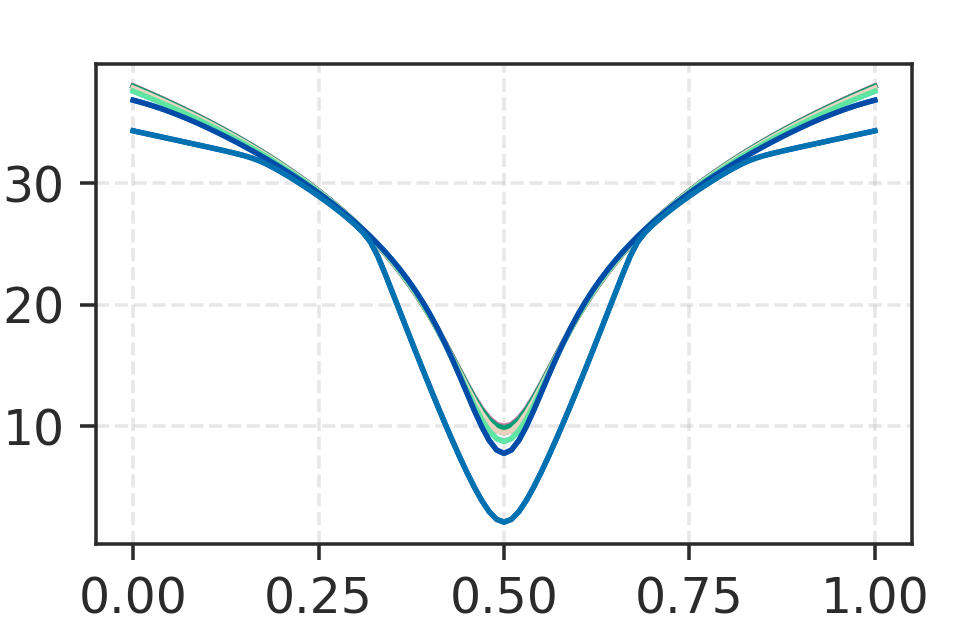

In [18]:
#surface_to_print = simulation_dictionary["1-2"][:,:,0]
surface_to_print = simulation_dictionary_phiplus_phiminus["eigvals"][:,
                                                    :, 1] - simulation_dictionary_phiplus_phiminus["eigvals"][:, :, 0]
i = 0
while i < len(surface_to_print[0]):
    plt.plot(np.linspace(0, 1, len(surface_to_print[i])), surface_to_print[i])
    i += 10
plt.show()

## Transition 01 plots

### 3D plots

<IPython.core.display.Javascript object>


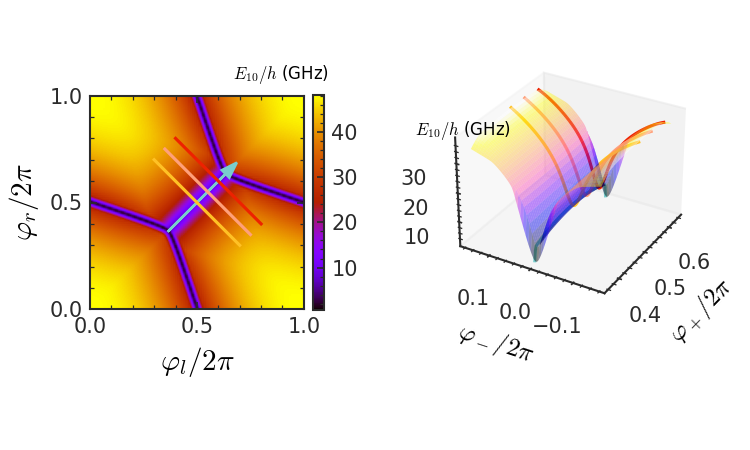

In [128]:
transition_01_phiplus_phiminus = (
    simulation_dictionary_phiplus_phiminus["eigvals"][:,:,1] - 
    simulation_dictionary_phiplus_phiminus["eigvals"][:, :, 0]
)
transition_01_in_phil_phir = (
    simulation_dictionary_phil_phir["eigvals"][:,:,1] -
    simulation_dictionary_phil_phir["eigvals"][:,:,0]
)

fig = plt.figure(figsize=(5, 3))
plt.subplots_adjust(left=0.12, bottom=None, right=0.9,
                     top=None, wspace=0.5, hspace=1)

ax_2d = fig.add_subplot(1, 2, 1)
im = ax_2d.imshow(
    transition_01_in_phil_phir,
    extent=[LOWER, UPPER, LOWER, UPPER],
    origin='lower',
#     cmap=cm.hot,
    cmap=cm.gnuplot,
    interpolation='bessel',
)
# Annotation
cb = fig.colorbar(im, ax=ax_2d, fraction=0.046, pad=0.04)
cb.ax.set_ylabel(r"$E_{10}/h$ (GHz)", fontsize=8,
                 rotation=0, ha="left", labelpad=-60, y=1.15)
ax_2d.set_xticks([0, 0.5, 1])
ax_2d.set_yticks([0, 0.5, 1])
ax_2d.set_xlabel(r"$\varphi_l/2\pi$", fontsize=14)
ax_2d.set_ylabel(r"$\varphi_r/2\pi$", fontsize=14)

(x0, y0, width, height) = ax_2d.get_position().bounds
(w_pad, h_pad, wspace, hspace) = fig.get_constrained_layout_pads()

ax_3d = fig.add_axes([x0 + width + 7 * hspace, y0, width * 1.5, height * 1.2], projection='3d')
ax_3d.zaxis._axinfo['juggled'] = (1,2,1)
grid_x, grid_y = np.meshgrid(phi_minus_list, phi_plus_list)
surf = ax_3d.plot_surface(grid_x / (2*pi), grid_y / (2 * pi),
                          transition_01_phiplus_phiminus,
#                           cmap=cm.hot,
                          cmap=cm.gnuplot2,
                          ccount=100,
                          rcount=100,
                          alpha=0.45,
                          linewidth=0, antialiased=True, edgecolor='red'
                          )

# Annotation
# ax_3d.view_init(elev=32, azim=32)
ax_3d.set_xlabel(r"$\varphi_-/2\pi$", fontsize=12)
ax_3d.set_ylabel(r"$\varphi_+/2\pi$", fontsize=12)
ax_3d.set_xticks([-0.1, 0, 0.1])
ax_3d.set_yticks([0.4, 0.5, 0.6])
ax_3d.set_zticks([0, 10, 20, 30])
# ax_3d.tick_params(axis='both', which='major', labelsize=8, pad=-2)
# ax_3d.minorticks_off()
ax_3d.grid(False)
# ax_3d.minorticks_off()
# ax_3d.grid(visible=False,which='major')
# ax_3d.grid(visible=None,which='minor')
# ax_3d.minorticks_off()
# ax_3d.w_xaxis.gridlines.set_lw(0)
# ax_3d.w_yaxis.gridlines.set_lw(0.1)
# ax_3d.w_zaxis.gridlines.set_lw(3.0)

ax_3d.zaxis.set_rotate_label(False)
#ax_3d.set_zlabel(r"$E_{10}/h$(GHz)", fontsize=10, rotation=0, labelpad=-10, x=10500)
ax_3d.text(x0, y0 - width * 0.5, 55, r"$E_{10}/h$ (GHz)", color='black',fontsize=8)

ax_3d.invert_xaxis()

#### Supplementary lines on 2D plot

In [129]:
def evaluate_endpoints_for_2d_phi_plus_slice(phi_plus_slice: float, length: float) -> Dict:
    """Return a dictionary of the coodinates for a alice in phi_plus"""
    coordinates = {
        "x0": phi_plus_slice - length,
        "x1": phi_plus_slice + length,
        "dx": length,
        "dy": - length
    }
    coordinates["y0"] = phi_plus_slice * 2 - coordinates["x0"]
    coordinates["y1"] = phi_plus_slice * 2 - coordinates["x1"]
    
    return coordinates

In [130]:
phiT0 = 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA) / (2 * pi)
phiT1 = (2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)) / (2 * pi)
ax_2d.arrow(phiT0, phiT0,
            phiT1-phiT0, phiT1-phiT0,
            color='C4', 
            head_width=0.05, head_starts_at_zero=False, 
            linewidth=1.2)

curve2_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.6, 0.2)
ax_2d.plot([curve2_coords["x0"], curve2_coords["x1"]],
           [curve2_coords["y0"], curve2_coords["y1"]],
#            color='#698b69', 
           color="C1",
           linewidth=1.5
          )
curve3_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.55, 0.2)
ax_2d.plot([curve3_coords["x0"], curve3_coords["x1"]],
           [curve3_coords["y0"], curve3_coords["y1"]],
           color="C6",
#            color='#00cd66', 
           linewidth=1.5
)
curve4_coords = evaluate_endpoints_for_2d_phi_plus_slice(0.5, 0.2)
ax_2d.plot([curve4_coords["x0"], curve4_coords["x1"]],
           [curve4_coords["y0"], curve4_coords["y1"]],
           color="C3",
#           color='#04f97f', 
           linewidth=1.5
          )

#### Supplementary lines on 3D plot

In [132]:
def build_curve_for_phi_plus_value(phi_plus_list: List[float],
                                   phi_minus_list: List[float],
                                   phi_plus_value: float,
                                   evaluated_potential_grid) -> Tuple:
    """Take the phi_plus_value and extract from the evaluated_potential_grid to build a cross-section cut"""
    idx = next(idx for (idx, val) in enumerate(
        phi_plus_list) if val > phi_plus_value)
    return (
        phi_minus_list / (2 * pi),
        [phi_plus_list[idx] / (2 * pi)] * len(phi_plus_list),
        evaluated_potential_grid[idx, :]
    )

def build_curve_for_phi_minus_value(phi_plus_list: List[float],
                                    phi_minus_list: List[float],
                                    phi_minus_value: float,
                                    evaluated_potential_grid) -> Tuple:
    """Take the phi_minus_value and extract from the evaluated_potential_grid to build a cross-section cut"""
    idx = next(idx for (idx, val) in enumerate(
        phi_minus_list) if val > phi_minus_value)
    return (
        [phi_minus_list[idx] / (2 * pi)] * len(phi_minus_list),
        phi_plus_list / (2 * pi),
        evaluated_potential_grid[:, idx]
    )

In [133]:
curves = {
    "curve1": build_curve_for_phi_minus_value(phi_plus_list,
                                             phi_minus_list,
                                             0,
                                             transition_01_phiplus_phiminus),
    "curve2": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.6 * (2*pi),
                                             transition_01_phiplus_phiminus),
    "curve3": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.55 * (2*pi),
                                             transition_01_phiplus_phiminus),
    "curve4": build_curve_for_phi_plus_value(phi_plus_list,
                                             phi_minus_list,
                                             0.5 * (2*pi),
                                             transition_01_phiplus_phiminus)
}

ax_3d.plot3D(curves["curve1"][0], curves["curve1"][1], curves["curve1"][2],  # c=zdata, cmap='Greens'
             color='C4', linewidth=1.5)
ax_3d.plot3D(curves["curve2"][0], curves["curve2"][1], curves["curve2"][2],  # c=zdata, cmap='Greens'
             color="C1",
#              color='#698b69',
             linewidth=1.5)
ax_3d.plot3D(curves["curve3"][0], curves["curve3"][1], curves["curve3"][2],  # c=zdata, cmap='Greens'
#               color='#00cd66', 
             color="C6",
             linewidth=1.5)
ax_3d.plot3D(curves["curve4"][0], curves["curve4"][1], curves["curve4"][2],  # c=zdata, cmap='Greens'
#              color='#04f97f', 
             color="C3",
             linewidth=1.5)

### Save

In [134]:
plotter.save_onto_white_background(ax_3d, "./output/twin/transition_01", "svg")

### Cross section plots

<IPython.core.display.Javascript object>


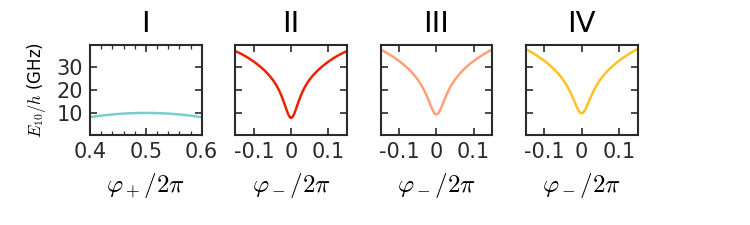

In [135]:
fig, ax = plt.subplots(1, 4, sharex=False, sharey=True, figsize=(5, 1.5))
plt.subplots_adjust(left=0.12, bottom=0.4, right=0.85,
                    top=0.8, wspace=None, hspace=None)

ax[0].plot(curves["curve1"][1], curves["curve1"][2], color="C4")
ax[0].set_title("I", fontsize=14)
ax[1].plot(curves["curve2"][0], curves["curve2"][2], color="C1"
#            color="#698b69"
          )
ax[1].set_title("II", fontsize=14)
ax[2].plot(curves["curve3"][0], curves["curve3"][2], color="C6"
#            color="#04f97f"
          )
ax[2].set_title("III", fontsize=14)
ax[3].plot(curves["curve4"][0], curves["curve4"][2], color="C3"
#            color="#00cd66"
          )
ax[3].set_title("IV", fontsize=14)

#ax[0].set_xticks([-0.5, 0, 0.5, 1, 1.5])
ax[0].set_xlabel(r"$\varphi_+/2\pi$", fontsize=12)
ax[0].set_ylabel(r"$E_{10}/h$ (GHz)", fontsize=8, rotation=90)
ax[0].set_xlim([0.4,0.6])
for i in range(1, 4):
    ax[i].minorticks_off()
    ax[i].set_xlabel(r"$\varphi_-/2\pi$", fontsize=12)
    ax[i].set_xlim([-0.15, 0.15])
    ax[i].set_xticks([-0.1, 0, 0.1])
    ax[i].set_xticklabels([-0.1, 0, 0.1])

In [136]:
plotter.save_onto_white_background(ax, "./output/twin/transition_01_cross_section", "svg")

# Transition matrix elements

## Prepare parameters

In [138]:
%matplotlib notebook
from typing import List, Tuple, Dict
import logging

import numpy as np
pi = np.pi
sin = np.sin
cos = np.cos
import matplotlib.pyplot as plt
plt.style.use("support-files/qubit-01.mplstyle")
from matplotlib import cm
import matplotlib as mpl

from quantum_builder import QuantumBuilder

In [139]:
ALPHA = 1.023
QUBIT_PARAMETERS = {
    "alpha": ALPHA,
    "assymetry": 1,
    "jj_squares": 3,
    "states_per_island": 9,
}
EC = 13.5
EJ = 91
LOWER = 0
UPPER = 1
MIDPOINT = (UPPER - LOWER) / 2

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, [], logging_level=logging.WARNING, other_parameters="test"
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)

In [140]:
COLOUR_SCHEME = {
#     0: "#104e8b",     # dark blue (DodgerBlue4)
#     1: "#ed2200",     # dark red (red2)
#     2: "#9acd32",     # goldenrod
#     3: "#ffc125"      # orange
    0: "C0",
    1: "C1",
    2: "C2",
    3: "C3"
}
COLOUR_SCHEME["d0-1"]  = COLOUR_SCHEME[0]
COLOUR_SCHEME["d1-2"]  = COLOUR_SCHEME[1]
COLOUR_SCHEME["d2-3"]  = COLOUR_SCHEME[2]
COLOUR_SCHEME["d0-2"]  = "#68838b"  # light steel blue
COLOUR_SCHEME["d0-3"]  = "#6959cd"  # dark purple
COLOUR_SCHEME["d1-3"]  = "#ffa07a"  # pink salmon

## Across $\varphi_-$ 
At $\varphi_+=\pi$

In [141]:
phi_minus_list = np.linspace(
    -0.04 * 2 * pi,
    0.04 * 2 * pi,
    201)
phi_plus_list = np.linspace(0.5 * 2 * pi, 0.5 * 2 * pi, 1)

simulation_dictionary_for_transition_matrix = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_plus_list, phi_minus_list, 5, phil_phir_coordinates_supplied=False,
    use_sparse_matrix=True
)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:05


In [145]:
fig = plt.figure(figsize=(3, 5))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(left=0.24, bottom=None, right=None,
                    top=None, wspace=None, hspace=None)

for idx in [0, 1, 2, 3]:
    ax[0].plot(phi_minus_list / (2 * pi), 
               simulation_dictionary_for_transition_matrix["eigvals"][0, :, idx],
               color=COLOUR_SCHEME[idx]
              )

for idx in [
    "d0-1", "d0-2",
    "d0-3", "d1-2",
    "d1-3", "d2-3"
]:
    ax[1].plot(
        phi_minus_list / (2 * pi),
        10**6 * simulation_dictionary_for_transition_matrix[
            idx
        ][0, :],
        color=COLOUR_SCHEME[idx]
    )

ax[0].set_title(r"$\varphi_+=\pi$", fontsize=14)
#ax[0].set_xlim([-0.135, 0.135])
#ax[0].set_ylim([-240, -160])

ax[0].set_ylabel(r"$E/h$(GHz)", fontsize=12)

ax[1].set_xlabel(r"$\varphi_-/2\pi$", fontsize=14)
ax[1].set_ylabel(r"Matrix elements ($\mu$V)", fontsize=11)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[0].yaxis.set_tick_params(labelsize=8)
# ax[0].minorticks_off()
# ax[1].minorticks_off()
#ax[0].set_yticks([-160, -180, -200, -220])

plt.show()

<IPython.core.display.Javascript object>

#### Save

In [146]:
plotter.save_onto_white_background(ax, "./output/twin/matrix_element_phi_minus", "svg")

## Across $\varphi_+$
> At $\varphi_-=0$

In [147]:
phi_degeneracy = (
    2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA),
    2 * pi - 2 * np.arccos(np.sqrt(float(ALPHA ** 2 + 1)) - ALPHA)
)
phi_minus_list = np.linspace(0, 0, 1)
phi_plus_list = np.linspace(
    phi_degeneracy[0], phi_degeneracy[1], 
    401)

simulation_dictionary_for_transition_matrix = twin_qubit.twin_qubit_simulator_phil_phir.simulate(
    phi_plus_list, phi_minus_list, 
    number_of_levels_to_simulate= 5, 
    phil_phir_coordinates_supplied=False,
    use_sparse_matrix=True
)

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:12


In [148]:
fig = plt.figure(figsize=(3, 5))
ax = fig.subplots(nrows=2, ncols=1, sharex=True)
plt.subplots_adjust(left=0.22, bottom=None, right=None,
                    top=None, wspace=None, hspace=None)

for idx in [0, 1, 2, 3]:
    ax[0].plot(phi_plus_list / (2 * pi), 
               simulation_dictionary_for_transition_matrix["eigvals"][:, 0,idx],
               color=COLOUR_SCHEME[idx]
              )

for idx in [
    "d0-1", "d1-2",
    "d1-3", "d2-3",
    "d0-2", "d0-3",
]:    
    ax[1].plot(
        phi_plus_list / (2 * pi),
        10**6 * simulation_dictionary_for_transition_matrix[
            idx
        ][:, 0],
        color=COLOUR_SCHEME[idx]
    )

ax[0].set_title(r"$\varphi_-=0$", fontsize=14)
ax[0].set_ylim([-240, -160])
# ax[0].set_xlim([0.37, 0.63])

ax[0].set_ylabel(r"$E/h$(GHz)", fontsize=12)
ax[1].set_xlabel(r"$\varphi_+/2\pi$", fontsize=14)
ax[1].set_ylabel(r"Matrix elements ($\mu$V)", fontsize=11)
ax[1].xaxis.set_tick_params(labelsize=10)
ax[0].yaxis.set_tick_params(labelsize=8)
plt.show()

<IPython.core.display.Javascript object>

#### Save

In [150]:
plotter.save_onto_white_background(ax, "./output/twin/matrix_element_phi_plus", "svg")

# Local Fluctuations
> Run simulation of energies E_01 when between loop1 and loop 2:
> - Random flux noise
> - Anticorrelated flux noise
>
> And then plot this on histogram

In [327]:
%matplotlib notebook
import logging

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ilya_plot")

from quantum_builder import QuantumBuilder

QUBIT_PARAMETERS = {
    "alpha": 1.023,
    "assymetry": 1,
    "jj_squares": 2,
    "states_per_island": 7,
}
FLUX_NUMBER = np.linspace(0.3, 0.7, 500)
EC = 13.5
EJ = 91
twin_qubit_fluctuation = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARNING
)
twin_qubit_fluctuation.override_parameters(EC=EC, EJ=EJ)

In [328]:
MU = 0.5
SIGMA = 0.01
NUMBER_OF_SIMULATIONS = 10000

twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, 3, condition="ABSENT")
default_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]
twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, NUMBER_OF_SIMULATIONS, condition="ANTICORRELATED")
correlated_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]
twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, NUMBER_OF_SIMULATIONS, condition="RANDOM")
random_energies = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]

twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                            0.01
number of simulations:        3
condition:                    ABSENT
Example pairs:                (0.5, 0.5)
                              (0.5, 0.5)


0% [███] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00
twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                            0.01
number of simulations:        10000
condition:                    ANTICORRELATED
Example pairs:                (0.5148460414346034, 0.48515395856539656)
                              (0.4955413764075992, 0.5044586235924008)


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:22
twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                       

In [412]:
twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, NUMBER_OF_SIMULATIONS, condition="ANTICORRELATED")
correlated_energies_2 = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]
twin_qubit_fluctuation.run_fluctuation_simulations(MU, SIGMA, NUMBER_OF_SIMULATIONS, condition="RANDOM")
random_energies_2 = twin_qubit_fluctuation.fluctuation_simulations["1-2-with-local-fluctuations"]

twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                            0.01
number of simulations:        10000
condition:                    ANTICORRELATED
Example pairs:                (0.5034344041469563, 0.4965655958530437)
                              (0.5019763850435751, 0.4980236149564249)


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:29
twin_qubit_local_fluctuation_simulator:44:generate_fluctuations
⮑  🐁 Generated fluctuations:
μ:                            0.5
σ:                            0.01
number of simulations:        10000
condition:                    RANDOM
Example pairs:                (0.4800000672132415, 0.5123034555739099)
                              (0.49208509805156436, 0.4997274112513149)


0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:02:55


## $\sigma=0.01$

In [329]:
normalised_random_energies = np.array(random_energies) / np.sum(random_energies)
normalised_correlated_energies = np.array(correlated_energies) / np.sum(correlated_energies)

In [335]:
plt.style.use("./support-files/qubit-01.mplstyle")

<IPython.core.display.Javascript object>


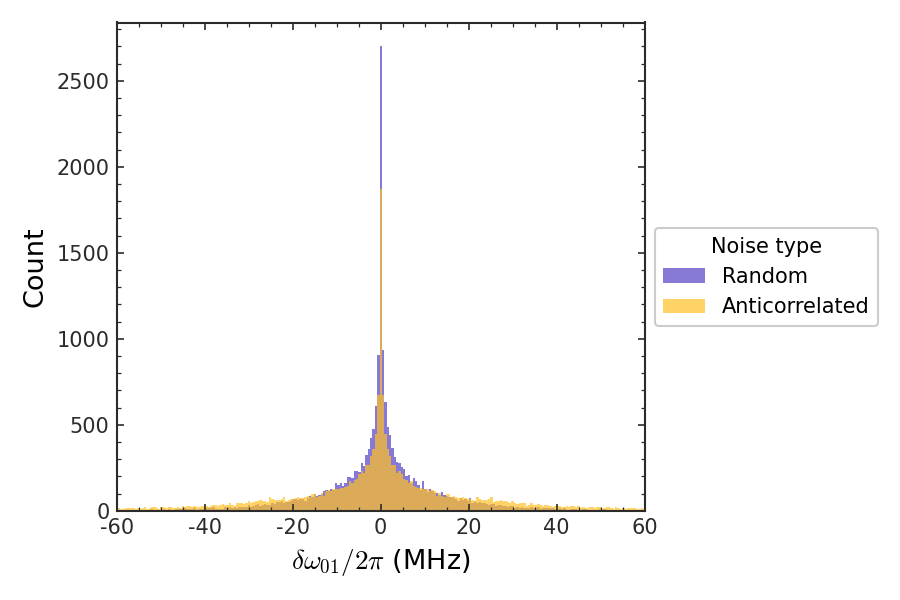

/Users/CCCP/.config/python_vi/qutip/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


In [482]:
# Dirty hacking, as spread cannot be larget than  GHz

from matplotlib.ticker import PercentFormatter
plt.style.use("./support-files/qubit-01.mplstyle")

default_energy = default_energies[0]
BIN_NUMBER = 500
MIN_RANGE = default_energy
MAX_RANGE = max([max(correlated_energies), max(random_energies)])
bins = np.linspace(default_energy - MAX_RANGE, MAX_RANGE - default_energy, BIN_NUMBER)

fig_fluc = plt.figure(figsize=(6, 4))
ax_fluc = fig_fluc.subplots(nrows=1, ncols=1)

r = list(-(random_energies_2 - default_energy)) + list((random_energies - default_energy))
ax_fluc.hist(r, bins=bins, weights=np.ones(len(r)),
             color="C5",
             alpha = 0.8, label="Random")
c = list(-(correlated_energies_2 - default_energy)) + list((correlated_energies_2 - default_energy))
ax_fluc.hist(c, bins=bins, weights=np.ones(len(c)),
             color="C3",
             alpha = 0.7, label="Anticorrelated")
# ax_fluc.axvline(x=default_energy - default_energy, linewidth=3.0, label="No flux noise", color="black")

ax_fluc.set_xlabel("$\delta\omega_{12}/2\pi$ (GHz)")
ax_fluc.set_ylabel("Count")
# ax_fluc.tick_params(labelsize=18)
# ax_fluc.tick_params(labelsize=18)
# ax_fluc.set_xlim([default_energy/1.01, 12])
ax_fluc.set_xlim([-6, 6])
ax_fluc.legend(title="Noise type",facecolor='white', framealpha=1, bbox_to_anchor=(1, 0.6), loc="upper left")
ax_fluc.set_xticklabels([-60,-40, -20, 0, 20, 40, 60])
ax_fluc.set_xlabel("$\delta\omega_{01}/2\pi$ (MHz)")

plt.tight_layout()
plt.show()

In [485]:
plt.savefig(f"./output/twin/twin-local_fluctuations.svg", transparent=True)

## $\sigma=0.001$

<IPython.core.display.Javascript object>


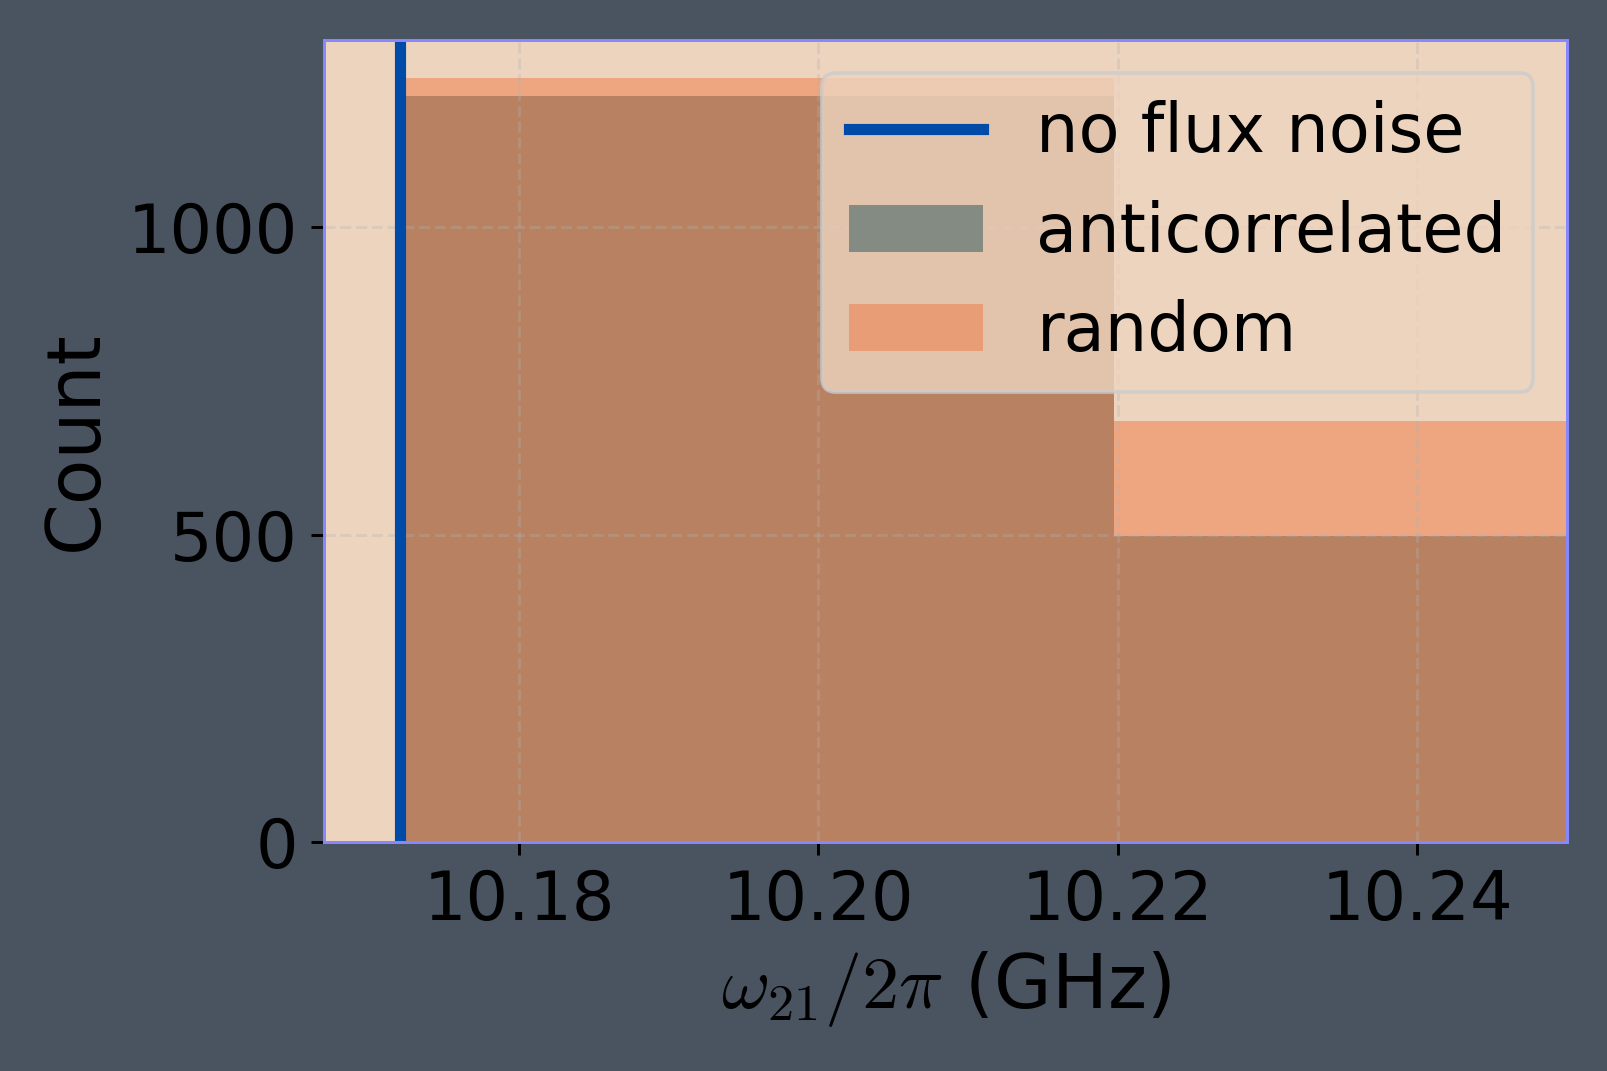

In [110]:
default_energy = default_energies[0]
BIN_NUMBER = 250
MIN_RANGE = default_energy
MAX_RANGE = max([max(correlated_energies), max(random_energies)])
bins = np.linspace(MIN_RANGE, MAX_RANGE, BIN_NUMBER)

fig_fluc = plt.figure(figsize=(6, 4))
ax_fluc = fig_fluc.subplots(nrows=1, ncols=1)

(count_correlated, bins_correlated, _) = ax_fluc.hist(correlated_energies, bins=bins, color="#838b83", alpha = 1.0, label="anticorrelated")
(count_random, bins_random, _) = ax_fluc.hist(random_energies, bins=bins, color="#ee7942", alpha = 0.5, label="random")
ax_fluc.axvline(x=default_energy, linewidth=3.0, label="no flux noise")

ax_fluc.set_xlabel("$\omega_{21}/2\pi$ (GHz)")
ax_fluc.set_ylabel("Count")
ax_fluc.tick_params(labelsize=18)
ax_fluc.tick_params(labelsize=18)
ax_fluc.set_xlim([default_energy/1.0005, 10.25])
ax_fluc.legend(fontsize=18)

plt.tight_layout()
plt.show()

In [112]:
plt.savefig(f"./output/local_fluctuations.svg", transparent=True)

# Rabi oscillations

## Fit

In [15]:
data=np.loadtxt("data/2018_dipole/rabi_oscillation.txt")
rabi_x = data[:,1]
rabi_y = data[:,2]

In [17]:
# from experimental_analysis.rabi_fitter import RabiFitter
from experimental_analysis.fit_functions import rabi_model
from scipy.optimize import curve_fit


# rabi_fitter = RabiFitter()
# (rabi_x, rabi_y) = rabi_fitter.load_data("data/2018_dipole/rabi_oscillation.txt", 1, 2)

(popt, pcov )= curve_fit(
    rabi_model,
#             rabi_fitter.rabi_fit_function,
            rabi_x,
            rabi_y,
#             [0.25, 42, 10,0,1e-5],
    [42, 10, 0.25, np.pi,1e-5]
#     maxfev=20000
#                bounds=([0, 35, 5, -np.pi, -1e-5], [1, 45, 20, np.pi, 1e-5]),
        )

print("  > Amplitude:\t%.3f" % (popt[0]))
print("  > t_dec:\t%.3f" % (popt[1]))
print("  > t_period:\t%.3f" % (popt[2]))
print("  > phi_offset:\t%.3f" % (popt[3]))
print("  > offset:\t%.3f" % (popt[4]))

  > Amplitude:	42.650
  > t_dec:	11.588
  > t_period:	0.000
  > phi_offset:	2.856
  > offset:	-0.000


## Plot

<IPython.core.display.Javascript object>


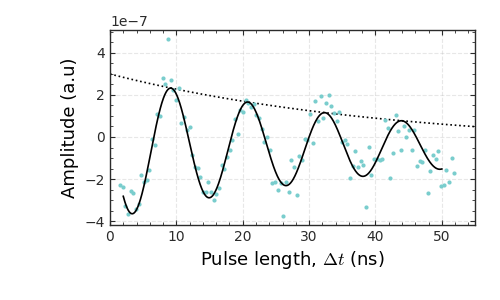

(0.0, 55.0)

In [21]:
fig = plt.figure(figsize=(5, 3))
ax = fig.subplots(nrows=1, ncols=1, sharex=True)
plt.subplots_adjust(left=0.22, bottom=0.25, right=None,
                    top=None, wspace=None, hspace=None)

rabi_x_fitted = np.linspace(2, 50, 1000)
decay = np.linspace(0, 60, 100)
rabi_y_fitted = rabi_model(
    rabi_x_fitted, 
    popt[0], popt[1], popt[2], popt[3], popt[4]
)

# ax.scatter(rabi_x, rabi_x, 
#            color="C8",
#            marker="o",
#            alpha=0.95
#           )
ax.plot(decay, popt[2]*np.exp(-decay/popt[0]) + popt[4], linestyle=":", color="black")

ax.plot(rabi_x, rabi_y, linestyle="", marker="o", color="C4",)
ax.plot(rabi_x_fitted, rabi_y_fitted, color="black"#color="#8b7e66"
       )
plt.grid()

ax.set_xlabel("Pulse length, $\Delta t$ (ns)")
ax.set_ylabel("Amplitude (a.u)")
ax.set_xlim([0,55])

In [22]:
plt.savefig(f"./output/twin/rabi-decay.svg", transparent=True)

# Misc

0% [██████████████████████████████] 100% | ETA: 00:00:00
Total time elapsed: 00:00:02


<IPython.core.display.Javascript object>


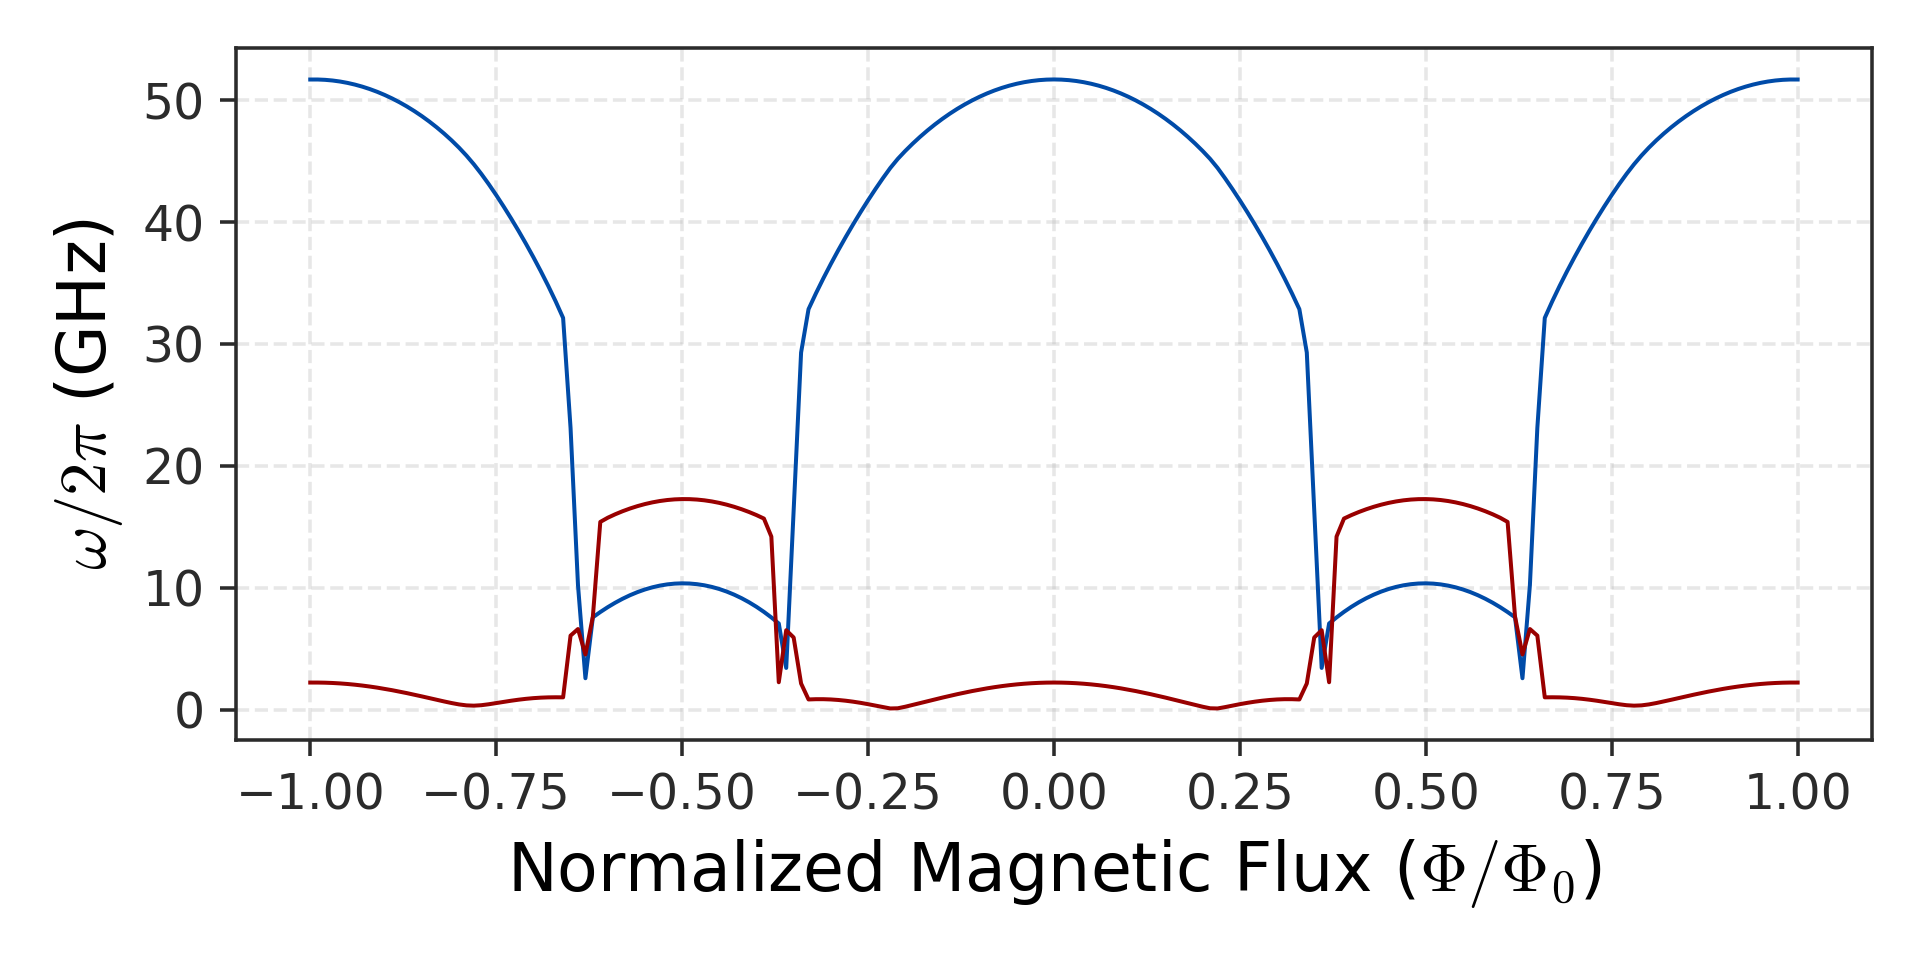

In [14]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("support-files/qubit.mplstyle")

from experimental_analysis.two_tone_data import TwoToneData
from utils import plotter

FLUX_NUMBER = np.linspace(-1, 1, 201)

twin_qubit = QuantumBuilder.build_twin_qubit(
    QUBIT_PARAMETERS, FLUX_NUMBER, logging_level=logging.WARN
)
twin_qubit.override_parameters(EC=EC, EJ=EJ)
twin_qubit.run_simulation(evaluate_dipole_element=True)


# 2 - plot simulation and spectrum
fig, ax = plt.subplots(1, 1, figsize=(6, 3))

ax.plot(FLUX_NUMBER, twin_qubit.simulations["1-2"], color="C0", linewidth=0.9)
ax.plot(FLUX_NUMBER, twin_qubit.simulations["2-3"], color="C4", linewidth=0.9)
# ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel("Normalized Magnetic Flux ($\Phi/\Phi_0$)", fontsize=15)
ax.set_ylabel("$\omega/2\pi$ (GHz)", fontsize=15)    
plt.tight_layout()

plt.savefig(f"./output/2021-03_cqps/twin_spectrum.svg", transparent=True)

# Raw specta

<IPython.core.display.Javascript object>


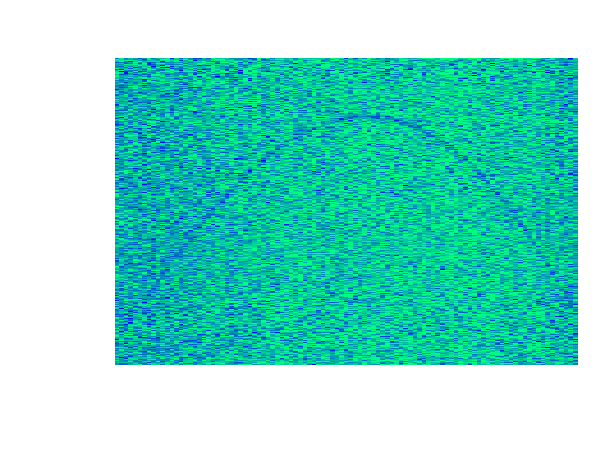

In [243]:
offset=0.125
period=0.7

FILENAME = "/Users/CCCP/Desktop/qubit-simulations/data/data_labview/1_energy_spectrum/Qubit15_5JJ_1Jun05'17_mfield_32_data.txt"

with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)

fig = plt.figure(figsize=(4, 3))
# fig.suptitle(FILENAME.split("/")[-1], fontsize=9)


ax = plt.subplot(111)
im = ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.winter,
#                    cmap=cm.gnuplot2,
#                    cmap = cm.magma,
                   vmax=1.01,
                   vmin=0.97
             )

ax.set_xlabel("Field Current (mA)")
ax.set_ylabel("$\omega_{01}/2\pi$ (GHz)")

# ax.set_ylim([4.5, 7.5])
# ax.set_xlim([-1.5, 1.5])
cb = fig.colorbar(im, orientation='vertical')
cb.ax.set_title("|t|")

plt.tight_layout()

# PNG
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
cb.remove() 
ax.axis('off') 
plt.savefig(FILENAME.replace(".txt",".png"), dpi=300, transparent=True, bbox_inches='tight',  pad_inches=0)

# SVG
# im.remove()
# plt.savefig(FILENAME.replace(".txt",".svg"), transparent=True)

<IPython.core.display.Javascript object>


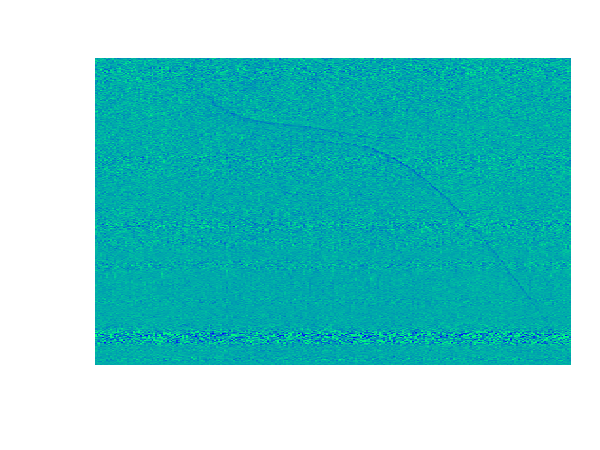

In [255]:

FILENAME = "/Users/CCCP/Desktop/qubit-simulations/data/data_labview/1_energy_spectrum/Qubit15_5JJ_1Jun05'17_mfield_60_data.txt"

with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)

fig = plt.figure(figsize=(4, 3))
# fig.suptitle(FILENAME.split("/")[-1], fontsize=9)


ax = plt.subplot(111)
im = ax.pcolormesh(data3d_xmesh, data3d_ymesh, data3d_z,
              shading='nearest',
              cmap=plt.cm.winter,
                   vmax=1.05,
                   vmin=0.9
             )

ax.set_xlabel("Field Current (mA)")
ax.set_ylabel("$\omega/2\pi$ (GHz)")

# ax.set_ylim([4.5, 7.5])
# ax.set_xlim([-1.5, 1.5])
cb = fig.colorbar(im, orientation='vertical')
cb.ax.set_title("|t|")

plt.tight_layout()

# PNG
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
cb.remove() 
ax.axis('off') 
plt.savefig(FILENAME.replace(".txt",".png"), dpi=300, transparent=True, bbox_inches='tight',  pad_inches=0)

# SVG
# im.remove()
# plt.savefig(FILENAME.replace(".txt",".svg"), transparent=True)

<IPython.core.display.Javascript object>


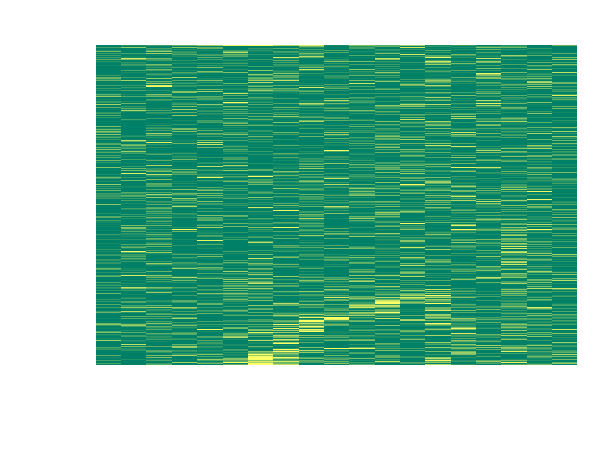

In [326]:

FILENAME = "/Users/CCCP/Desktop/qubit-simulations/data/data_labview/1_energy_spectrum/Qubit15_5JJ_1Jun05'17_62.txt"

with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])/10**9
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)

fig = plt.figure(figsize=(4, 3))
# fig.suptitle(FILENAME.split("/")[-1], fontsize=9)


ax = plt.subplot(111)
im = ax.pcolormesh(data3d_xmesh, data3d_ymesh, np.abs(data3d_z),
              shading='nearest',
              cmap=plt.cm.summer,
                   vmax=1.05*10**(-5),
                   vmin=0.2*10**(-5)
             )

ax.set_xlabel("Field Current (mA)")
ax.set_ylabel(r"$\omega_{12}^{p}/2\pi$ (GHz)")

# ax.set_ylim([4.5, 7.5])
# ax.set_xlim([-1.5, 1.5])
cb = fig.colorbar(im, orientation='vertical')
cb.set_label('|t|', labelpad=-1,rotation=0)

plt.tight_layout()

# PNG
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
cb.remove() 
ax.axis('off') 
plt.savefig(FILENAME.replace(".txt",".png"), dpi=300, transparent=True, bbox_inches='tight',  pad_inches=0)

# SVG
# im.remove()
# plt.savefig(FILENAME.replace(".txt",".svg"), transparent=True)

<IPython.core.display.Javascript object>


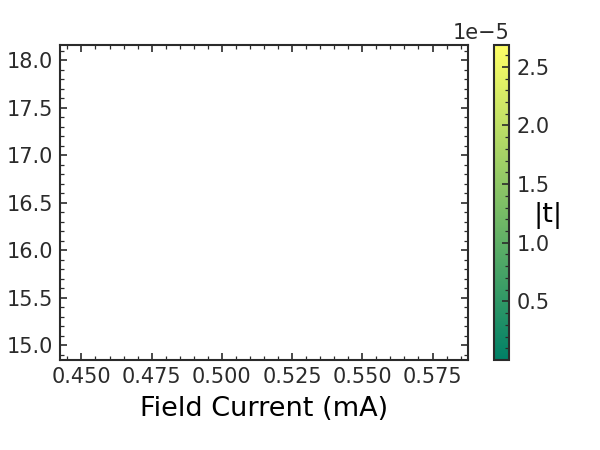

In [324]:

FILENAME = "/Users/CCCP/Desktop/qubit-simulations/data/data_labview/1_energy_spectrum/Qubit15_5JJ_1Jun05'17_51.txt"

with open(FILENAME) as fin:
    data3d_z = np.transpose(np.loadtxt(FILENAME))
    
    first_line = fin.readline().split()
    data3d_x = np.linspace(float(first_line[1]), float(first_line[2]), data3d_z.shape[1])
    
    second_line = fin.readline().split()
    data3d_y = np.linspace(float(second_line[1]), float(second_line[2]), data3d_z.shape[0])/GHz
data3d_xmesh, data3d_ymesh = np.meshgrid(data3d_x, data3d_y)

fig = plt.figure(figsize=(4, 3))
# fig.suptitle(FILENAME.split("/")[-1], fontsize=9)


ax = plt.subplot(111)
im = ax.pcolormesh(data3d_xmesh, data3d_ymesh, np.abs(data3d_z),
              shading='nearest',
              cmap=plt.cm.summer,
#                    vmax=1.05
#                    vmin=0.4*10**(-5)
             )

ax.set_xlabel("Field Current (mA)")
ax.set_ylabel("$\omega_{12}^p/2\pi$ (GHz)")

# ax.set_ylim([4.5, 7.5])
# ax.set_xlim([-1.5, 1.5])
cb = fig.colorbar(im, orientation='vertical')
cb.set_label('|t|', labelpad=-1,rotation=0)

# PNG
# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
# cb.remove() 
# ax.axis('off') 
# plt.savefig(FILENAME.replace(".txt",".png"), dpi=300, transparent=True, bbox_inches='tight',  pad_inches=0)

# SVG
im.remove()
plt.savefig(FILENAME.replace(".txt",".svg"), transparent=True)

# CP truncation

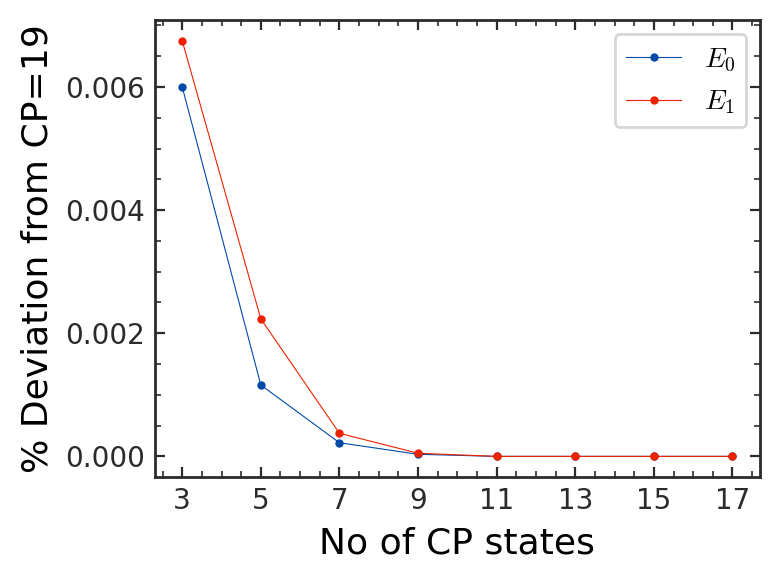

In [15]:
plt.style.use("support-files/qubit-01.mplstyle")

fig, ax = plt.subplots(1,1, figsize=(4,3))

MAX = 352 / 0.006
cp = [3, 5, 7, 9, 11, 13, 15, 17]
level1 = np.array([352, 68, 13, 2, 0, 0, 0, 0])/MAX
level2 = np.array([396, 131, 22, 3, 0, 0, 0, 0])/MAX
ax.plot(cp, level1, marker='o', linewidth=0.4, label="$E_0$")
ax.plot(cp, level2, marker='o', linewidth=0.4, label="$E_1$")

ax.set_xticks([3, 5, 7, 9, 11, 13, 15, 17])
ax.set_yticks([0, 0.002, 0.004, 0.006])
ax.set_xlabel("No of CP states")
ax.set_ylabel("% Deviation from CP=19")
ax.legend()
plt.tight_layout()

plt.savefig("./output/twin/cp-truncation.pdf")